<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Climate Change Effects On Commodity Prices</h1>
</div>

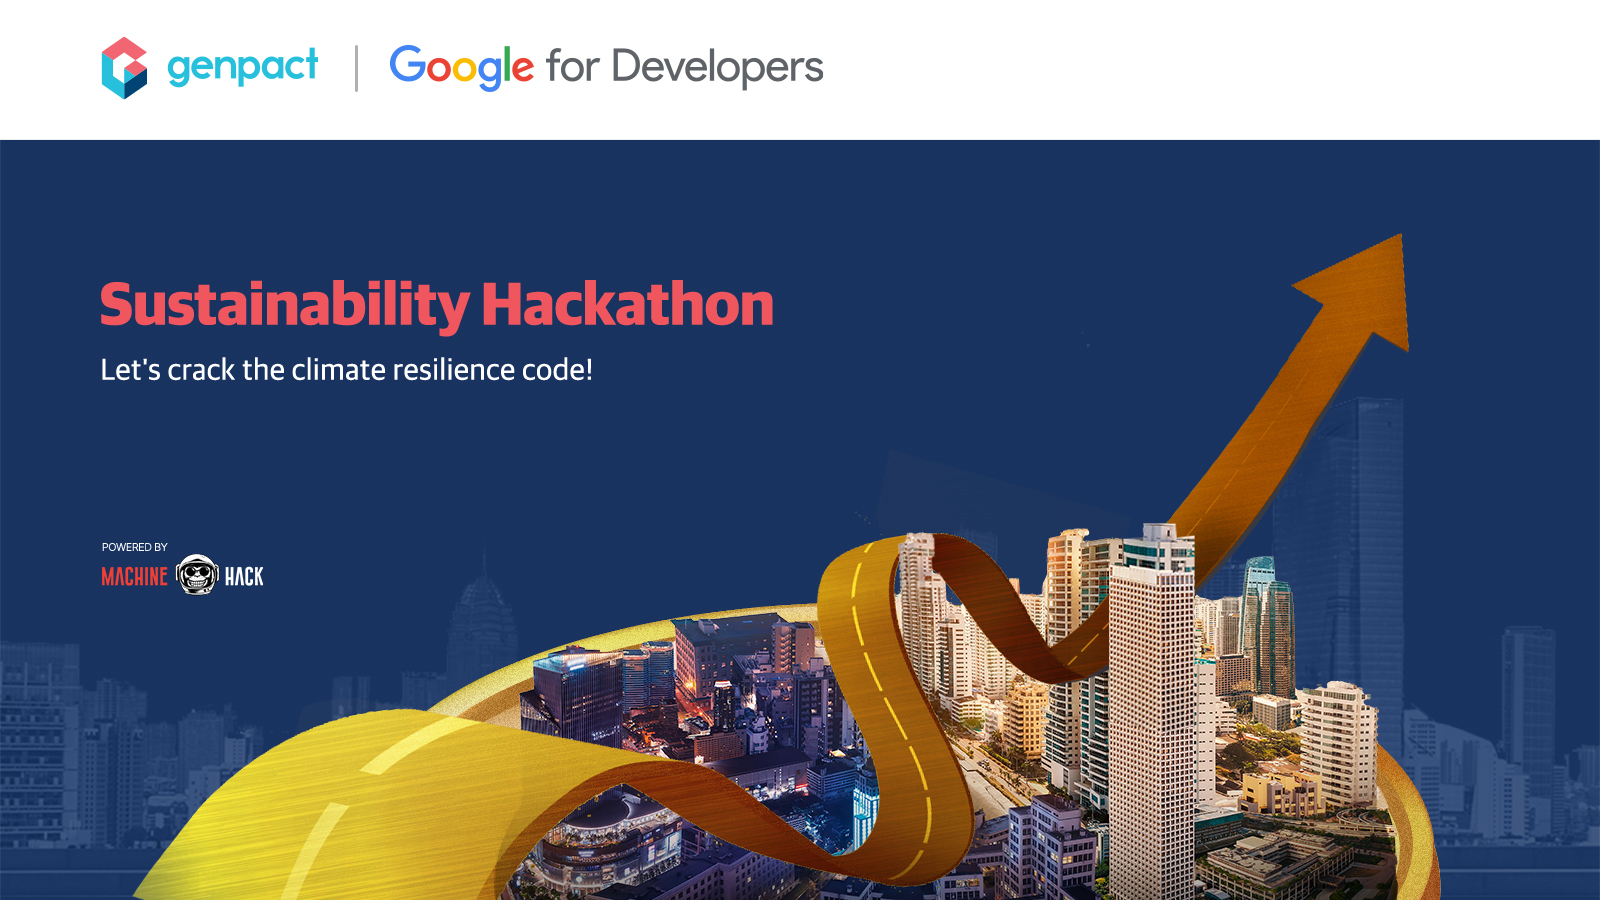

Author:- Aniket B. Barphe
    
LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
        
Platform:- MachineHack (Sustainability-Hackathon-02 June 2023 to 21 July 2023)
    
Problem Statement:- Build a machine learning-based approach to forecast climate change effects on commodity prices

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [155]:
# Data manipulation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import catboost as cb
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor


# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

CatBoost version 1.1
NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.0.1
xgboost version 1.6.2
lightgbm version 3.3.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Processed_Train" data of "India" in "Ind_train" Variable
- Read & Load "Processed_Test" data of "India" in "Ind_test" Variable 
- Read & Load "Train" data of "USA" in "usa_train" Variable 
- Read & Load "Test" data of "USA" in "usa_test" Variable
- Read & Load "USA Commodity Prices" data in "commodity" Variable

In [105]:
Ind_train = pd.read_csv(r'C:\Users\PC\Pictures\MH\Sustainability-Hackathon -June23\Model_Input\India_Train-Processed.csv')
Ind_test = pd.read_csv(r'C:\Users\PC\Pictures\MH\Sustainability-Hackathon -June23\Model_Input\India_Test-Processed.csv')
usa_train = pd.read_csv(r"C:\Users\PC\Pictures\MH\Sustainability-Hackathon -June23\Model_Input\USA_train.csv")
usa_test = pd.read_csv(r"C:\Users\PC\Pictures\MH\Sustainability-Hackathon -June23\Model_Input\USA_test.csv")
commodity = pd.read_csv(r"C:\Users\PC\Pictures\MH\Sustainability-Hackathon -June23\Model_Input\USA_Commodity_prices.csv")

<span style="color:green">"Processed_Train and Processed_Test data for India refer to datasets that have undergone a data cleaning process. These datasets are the result of handling missing values through imputation methods applied to the original raw data."</span>

### <span style="color:black">The following methods were used to address missing data in both the original raw training and testing datasets for India:-</span>

##### <span style="color:red"> Variable 1) COTTON AREA (1000 ha):-</span>

1.1) Replaced negative values with zero.

1.2) Replaced blank values with zero in cases where both "COTTON PRODUCTION (1000 tons)" and "COTTON YIELD (Kg per ha)" are zero.

1.3) After executing steps 1.1 and 1.2, selected data where "COTTON PRODUCTION (1000 tons)" and "COTTON YIELD (Kg per ha)" are both non-zero and non-negative. Then, created a pivot table using the 'Year' variable in the filter and 'State' and 'District' in the row field to calculate the average value of 'COTTON AREA (1000 ha)' at the 'State' and 'District' levels.

Finally, replaced blank values in the original data with the calculated 'Average Value of COTTON AREA (1000 ha)' values, using a common key formed by concatenating 'State' and 'District'.

1.4) At last, replace missing values in the 'COTTON AREA (1000 ha)' column with 'Zero' in cases where the corresponding 'COTTON PRODUCTION (1000 tons)' values are also missing.


##### <span style="color:red"> Variable 2) COTTON PRODUCTION (1000 tons):-</span>

2.1) Replaced negative values with zero when 'COTTON AREA (1000 ha)' is zero.

2.2) Substituted negative values with the 'Average value of COTTON PRODUCTION (1000 tons)' when 'COTTON AREA (1000 ha)' is non-zero or non-negative.

2.3) Set blank values to zero when both 'COTTON AREA (1000 ha)' and 'COTTON YIELD (Kg per ha)' are zero.

2.4) Ultimately, filled blank values in the original data with the computed 'Average Value of COTTON PRODUCTION (1000 tons)' where 'COTTON AREA (1000 ha)' is non-negative, non-zero, and non-blank, utilizing a common key formed by concatenating 'State' and 'District'.


##### <span style="color:red"> Variable 3) COTTON YIELD (Kg per ha):-</span>

3.1) If both 'COTTON AREA (1000 ha)' and 'COTTON PRODUCTION (1000 tons)' are zero, any negative values were replaced with zero.

3.2) For any remaining negative values, they were replaced with the 'Average Value of COTTON YIELD (Kg per ha)' when 'COTTON AREA (1000 ha)' is both non-zero and non-negative using a common key formed by concatenating 'State' and 'District'.

##### <span style="color:red"> Variable 4) Month_Name PERCIPITATION (Millimeters):-</span>

The missing values in all monthly precipitation features (e.g., JANUARY PERCIPITATION in Millimeters) were substituted with the corresponding month's standard rainfall values (e.g., JANUARY NORMAL RAINFALL in Millimeters) from the dataset (India_soil_rainfall_30years.csv). This substitution was carried out using a shared key formed by combining the 'State' and 'District' columns.

##### <span style="color:red"> Variable 5) Month_Name MINIMUM (Centigrate):-</span>

Missing values in the monthly minimum temperature features (e.g., 'JANUARY MINIMUM (Centigrate)') were replaced with the average values of the respective month. This replacement was done based on a unique key created by combining the 'State' and 'District' columns.


##### <span style="color:red"> Variable 6) Month_Name MAXIMUM (Centigrate):-</span>

The missing values within the monthly maximum temperature features, such as 'JANUARY MAXIMUM (Centigrade),' were addressed by substituting them with the corresponding month's average values. This substitution was performed using a distinctive identifier formed by combining the 'State' and 'District' columns.

##### <span style="color:red"> Variable 7) Group_of_Variables:-</span>

Blank values in the following variables have been replaced with zero:

'NITROGEN CONSUMPTION (tons)', 'NITROGEN SHARE IN NPK (Percent)', 'NITROGEN PER HA OF NCA (Kg per ha)',
'NITROGEN PER HA OF GCA (Kg per ha)', 'PHOSPHATE CONSUMPTION (tons)', 'PHOSPHATE SHARE IN NPK (Percent)',
'PHOSPHATE PER HA OF NCA (Kg per ha)', 'PHOSPHATE PER HA OF GCA (Kg per ha)', 'POTASH CONSUMPTION (tons)',
'POTASH SHARE IN NPK (Percent)', 'POTASH PER HA OF NCA (Kg per ha)', 'POTASH PER HA OF GCA (Kg per ha)',
'TOTAL CONSUMPTION (tons)', 'TOTAL PER HA OF NCA (Kg per ha)', 'TOTAL PER HA OF GCA (Kg per ha)'

##### <span style="color:red"> Variable 8) TOTAL AREA (1000 ha):-</span>

Blank values in the "TOTAL AREA (1000 ha)" column were calculated using the following formula:

TOTAL AREA (1000 ha) = 
                       
                       [FOREST AREA (1000 ha)] + 

                       [BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +

                       [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] +
                       
                       [CULTIVABLE WASTE LAND AREA (1000 ha)] + [PERMANENT PASTURES AREA (1000 ha)] +
                       
                       [OTHER FALLOW AREA (1000 ha)] +[CURRENT FALLOW AREA (1000 ha)] + 
                       
                       [NET CROPPED AREA (1000 ha)]



##### <span style="color:red"> Variable 9) FOREST AREA (1000 ha):-</span>

9.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

FOREST AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +

                                                  [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] +
                                                  [CULTIVABLE WASTE LAND AREA (1000 ha)] + 
                                                  [PERMANENT PASTURES AREA (1000 ha)] +
                                                  [OTHER FALLOW AREA (1000 ha)] +
                                                  [CURRENT FALLOW AREA (1000 ha)] + 
                                                  [NET CROPPED AREA (1000 ha)]}
                                                  
9.2) If there were any negative values resulting from this calculation, they were replaced with zero.

9.3) Any remaining blank values were also replaced with zero.

##### <span style="color:red"> Variable 10) BARREN AND UNCULTIVABLE LAND AREA (1000 ha):-</span>

10.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

BARREN AND UNCULTIVABLE LAND AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[FOREST AREA (1000 ha)] +

                                                  [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] +
                                                  [CULTIVABLE WASTE LAND AREA (1000 ha)] + 
                                                  [PERMANENT PASTURES AREA (1000 ha)] +
                                                  [OTHER FALLOW AREA (1000 ha)] +
                                                  [CURRENT FALLOW AREA (1000 ha)] + 
                                                  [NET CROPPED AREA (1000 ha)]}
                                                  
10.2) If there were any negative values resulting from this calculation, they were replaced with zero.

10.3) Any remaining blank values were also replaced with zero.


##### <span style="color:red"> Variable 11) LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha):-</span>

11.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[FOREST AREA (1000 ha)] +

                                                  [BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +
                                                  [CULTIVABLE WASTE LAND AREA (1000 ha)] + 
                                                  [PERMANENT PASTURES AREA (1000 ha)] +
                                                  [OTHER FALLOW AREA (1000 ha)] +
                                                  [CURRENT FALLOW AREA (1000 ha)] + 
                                                  [NET CROPPED AREA (1000 ha)]}
                                                  
11.2) If there were any negative values resulting from this calculation, they were replaced with zero.

11.3) Any remaining blank values were also replaced with zero.


##### <span style="color:red"> Variable 12) CULTIVABLE WASTE LAND AREA (1000 ha):-</span>

12.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

CULTIVABLE WASTE LAND AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[FOREST AREA (1000 ha)] +

                                                  [BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +
                                                  [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] + 
                                                  [PERMANENT PASTURES AREA (1000 ha)] +
                                                  [OTHER FALLOW AREA (1000 ha)] +
                                                  [CURRENT FALLOW AREA (1000 ha)] + 
                                                  [NET CROPPED AREA (1000 ha)]}
                                                  
12.2) If there were any negative values resulting from this calculation, they were replaced with zero.

12.3) Any remaining blank values were also replaced with zero.


##### <span style="color:red"> Variable 13) PERMANENT PASTURES AREA (1000 ha):-</span>

13.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

PERMANENT PASTURES AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[FOREST AREA (1000 ha)] +

                                                  [BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +
                                                  [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] + 
                                                  [CULTIVABLE WASTE LAND AREA (1000 ha)] +
                                                  [OTHER FALLOW AREA (1000 ha)] +
                                                  [CURRENT FALLOW AREA (1000 ha)] + 
                                                  [NET CROPPED AREA (1000 ha)]}
                                                  
13.2) If there were any negative values resulting from this calculation, they were replaced with zero.

13.3) Any remaining blank values were also replaced with zero.


##### <span style="color:red"> Variable 14) OTHER FALLOW AREA (1000 ha):-</span>

14.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

OTHER FALLOW AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[FOREST AREA (1000 ha)] +

                                                  [BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +
                                                  [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] + 
                                                  [CULTIVABLE WASTE LAND AREA (1000 ha)] +
                                                  [PERMANENT PASTURES AREA (1000 ha)] +
                                                  [CURRENT FALLOW AREA (1000 ha)] + 
                                                  [NET CROPPED AREA (1000 ha)]}
                                                  
14.2) If there were any negative values resulting from this calculation, they were replaced with zero.

14.3) Any remaining blank values were also replaced with zero.


##### <span style="color:red"> Variable 15) CURRENT FALLOW AREA (1000 ha):-</span>

15.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

CURRENT FALLOW AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[FOREST AREA (1000 ha)] +

                                                  [BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +
                                                  [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] + 
                                                  [CULTIVABLE WASTE LAND AREA (1000 ha)] +
                                                  [PERMANENT PASTURES AREA (1000 ha)] +
                                                  [OTHER FALLOW AREA (1000 ha)] + 
                                                  [NET CROPPED AREA (1000 ha)]}
                                                  
15.2) If there were any negative values resulting from this calculation, they were replaced with zero.

15.3) Any remaining blank values were also replaced with zero.

##### <span style="color:red"> Variable 16) NET CROPPED AREA (1000 ha):-</span>

16.1) To calculate blank values, applied the following formula, assuming that all other parameters are non-zero:

NET CROPPED AREA (1000 ha) = 

                                                  [TOTAL AREA (1000 ha)] - 
                                                 
                                                 {[FOREST AREA (1000 ha)] +

                                                  [BARREN AND UNCULTIVABLE LAND AREA (1000 ha)] +
                                                  [LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)] + 
                                                  [CULTIVABLE WASTE LAND AREA (1000 ha)] +
                                                  [PERMANENT PASTURES AREA (1000 ha)] +
                                                  [OTHER FALLOW AREA (1000 ha)] + 
                                                  [CURRENT FALLOW AREA (1000 ha)]}
                                                  
16.2) If there were any negative values resulting from this calculation, they were replaced with zero.

16.3) Any remaining blank values were also replaced with zero.

##### <span style="color:red"> Variable 17) GROSS CROPPED AREA (1000 ha):-</span>

17.1) Replace Missing Values with Zero.

17.2) If 'GROSS CROPPED AREA (1000 ha)' is equal to zero, and both 'CROPING INTENSITY (Percent)' and 'NET CROPPED AREA (1000 ha)' are non-zero, then use the following formula for imputation:

GROSS CROPPED AREA (1000 ha) = [ 'CROPING INTENSITY (Percent)' * 'NET CROPPED AREA (1000 ha)']/100

17.3) If 'GROSS CROPPED AREA (1000 ha)' is equal to zero, 'CROPING INTENSITY (Percent)' is not available, and 'NET CROPPED AREA (1000 ha)' is non-zero, then impute using the following formula:

GROSS CROPPED AREA (1000 ha) = NET CROPPED AREA (1000 ha)

17.4) Retain 'GROSS CROPPED AREA (1000 ha)' as zero when both 'NET CROPPED AREA (1000 ha)' and 'CROPING INTENSITY (Percent)' are zero.


##### <span style="color:red"> Variable 18) CROPING INTENSITY (Percent):-</span>

18.1) When 'CROPING INTENSITY (Percent)' is blank, and both 'GROSS CROPPED AREA (1000 ha)' and 'NET CROPPED AREA (1000 ha)' are non-zero, apply the following formula for imputation:

CROPING INTENSITY (Percent) = [ 'GROSS CROPPED AREA (1000 ha)' / 'NET CROPPED AREA (1000 ha)']/100

18.2) Fill all other blanks with zero.

##### <span style="color:red"> Variable 19) Month_Name WATER DEFICIT (Millimeters):-</span>

19.1) To address missing values in the monthly WATER DEFICIT features (e.g., 'JANUARY WATER DEFICIT (Millimeters)'), employed a formula specific to each month. This formula calculated the water deficit as the difference between the POTENTIAL (Millimeters) and ACTUAL (Millimeters) values for that respective month. For instance:

Month_Name WATER DEFICIT (Millimeters) =  [Month_Name POTENTIAL (Millimeters)] - [Month_Name ACTUAL (Millimeters)]

Example:

JANUARY WATER DEFICIT (Millimeters) = [JANUARY POTENTIAL (Millimeters)] - [JANUARY ACTUAL (Millimeters)]

19.2) To maintain data consistency, any negative values resulting from this calculation were substituted with zero.

19.3) For the remaining missing values, we replaced them with zeros as well, ensuring uniformity in the dataset.

 <span style="color:blue">Please note that the 'SEPTEMBER WATER DEFICIT (Millimeters)' variable has been calculated using the formula provided earlier.</span>

##### <span style="color:red"> Variable 20) Month_Name ACTUAL (Millimeters):-</span>

The missing values in the monthly 'ACTUAL (Millimeters)' features (e.g., 'JANUARY ACTUAL (Millimeters)') were filled with zeros.

##### <span style="color:red"> Variable 21) Month_Name POTENTIAL (Millimeters):-</span>

Substituted missing values in the monthly POTENTIAL (Millimeters) features, such as 'JANUARY POTENTIAL (Millimeters),' with zeros.

<span style="color:orange">"Additionally, three new features, such as 'Soil_Type1', 'Soil_Type2', and 'Soil_Type3', were created based on the 'SOIL TYPE PERCENT (Percent)' feature found in the file named 'India_soil_rainfall_30years.csv'. These newly derived features were then integrated into both the Processed_Train and Processed_Test datasets using a unique identifier formed by combining the 'State' and 'District' columns."</span>

<span style="color:orange">"Furthermore, the 'ANNUAL NORMAL RAINFALL (Millimeters)' feature from the same file was also incorporated into both the Processed_Train and Processed_Test datasets using a distinctive identifier created by combining the 'State' and 'District' columns."</span>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset

#### * For India

In [106]:
print("Data Types in India_Train Data:-\n")
print(Ind_train.info(),'\n')

print("Shape of India_Train Data:-\n")
print(Ind_train.shape,'\n')

print('-------------'*9)

print("\nData Types in India_Test Data:-\n")
print(Ind_test.info(),'\n')

print("\nShape of India_Test Data:-\n")
print(Ind_test.shape,'\n')

print('-------------'*9)

Data Types in India_Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Columns: 110 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(97), int64(6), object(7)
memory usage: 3.9+ MB
None 

Shape of India_Train Data:-

(4705, 110) 

---------------------------------------------------------------------------------------------------------------------

Data Types in India_Test Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Columns: 110 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(96), int64(7), object(7)
memory usage: 2.1+ MB
None 


Shape of India_Test Data:-

(2476, 110) 

---------------------------------------------------------------------------------------------------------------------


In [107]:
print("About India_Train Data:-\n")
print(Ind_train.head(),'\n')
print('-------------'*9)

print("\nAbout India_Test Data:-\n")
print(Ind_test.head(),'\n')
print('-------------'*9)

About India_Train Data:-

   Year      State Name      Dist Name                Unique_Ref_Key  \
0  1990  Andhra Pradesh     Srikakulam     Andhra Pradesh-Srikakulam   
1  1990  Andhra Pradesh  Visakhapatnam  Andhra Pradesh-Visakhapatnam   
2  1990  Andhra Pradesh  East Godavari  Andhra Pradesh-East Godavari   
3  1990  Andhra Pradesh  West Godavari  Andhra Pradesh-West Godavari   
4  1990  Andhra Pradesh        Krishna        Andhra Pradesh-Krishna   

   COTTON AREA (1000 ha)  COTTON PRODUCTION (1000 tons)  \
0                    0.0                            0.0   
1                    7.0                            3.0   
2                   49.0                          238.0   
3                   26.0                          120.0   
4                  996.0                          289.0   

   COTTON YIELD (Kg per ha) Soil_Type1      Soil_Type2     Soil_Type3  \
0                       0.0    ORTHIDS   Not_Available  Not_Available   
1                    3333.0    ORTHIDS  

In [108]:
print("About India_Train Data:-\n")
print(Ind_train.tail(),'\n')
print('-------------'*9)

print("\nAbout India_Test Data:-\n")
print(Ind_test.tail(),'\n')
print('-------------'*9)

About India_Train Data:-

      Year   State Name    Dist Name           Unique_Ref_Key  \
4700  2006  West Bengal   Jalpaiguri   West Bengal-Jalpaiguri   
4701  2006  West Bengal   Darjeeling   West Bengal-Darjeeling   
4702  2006  West Bengal        Malda        West Bengal-Malda   
4703  2006  West Bengal  Cooch Behar  West Bengal-Cooch Behar   
4704  2006  West Bengal      Purulia      West Bengal-Purulia   

      COTTON AREA (1000 ha)  COTTON PRODUCTION (1000 tons)  \
4700                    0.0                            0.0   
4701                    0.0                            0.0   
4702                    0.0                            0.0   
4703                    0.0                            0.0   
4704                    0.0                            0.0   

      COTTON YIELD (Kg per ha)      Soil_Type1      Soil_Type2     Soil_Type3  \
4700                       0.0     INCEPTISOLS   Not_Available  Not_Available   
4701                       0.0     INCEPTISOLS  

In [109]:
Ind_train.describe(include='all') 

,Year,State Name,Dist Name,Unique_Ref_Key,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),Soil_Type1,Soil_Type2,Soil_Type3,JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),JULY PERCIPITATION (Millimeters),AUGUST PERCIPITATION (Millimeters),SEPTEMBER PERCIPITATION (Millimeters),OCTOBER PERCIPITATION (Millimeters),NOVEMBER PERCIPITATION (Millimeters),DECEMBER PERCIPITATION (Millimeters),Annual_Normal_RF(mm),RF_Category,JANUARY MINIMUM (Centigrate),FEBRUARY MINIMUM (Centigrate),MARCH MINIMUM (Centigrate),APRIL MINIMUM (Centigrate),MAY MINIMUM (Centigrate),JUNE MINIMUM (Centigrate),JULY MINIMUM (Centigrate),AUGUST MINIMUM (Centigrate),SEPTEMBER MINIMUM (Centigrate),OCTOBER MINIMUM (Centigrate),NOVEMBER MINIMUM (Centigrate),DECEMBER MINIMUM (Centigrate),JANUARY MAXIMUM (Centigrate),FEBRUARY MAXIMUM (Centigrate),MARCH MAXIMUM (Centigrate),APRIL MAXIMUM (Centigrate),MAY MAXIMUM (Centigrate),JUNE MAXIMUM (Centigrate),JULY MAXIMUM (Centigrate),AUGUST MAXIMUM (Centigrate),SEPTEMBER MAXIMUM (Centigrate),OCTOBER MAXIMUM (Centigrate),NOVEMBER MAXIMUM (Centigrate),DECEMBER MAXIMUM (Centigrate),JANUARY WATER DEFICIT (Millimeters),FEBRUARY WATER DEFICIT (Millimeters),MARCH WATER DEFICIT (Millimeters),APRIL WATER DEFICIT (Millimeters),MAY WATER DEFICIT (Millimeters),JUNE WATER DEFICIT (Millimeters),JULY WATER DEFICIT (Millimeters),AUGUST WATER DEFICIT (Millimeters),SEPTEMBER WATER DEFICIT (Millimeters),OCTOBER WATER DEFICIT (Millimeters),NOVEMBER WATER DEFICIT (Millimeters),DECEMBER WATER DEFICIT (Millimeters),JANUARY ACTUAL (Millimeters),FEBRUARY ACTUAL (Millimeters),MARCH ACTUAL (Millimeters),APRIL ACTUAL (Millimeters),MAY ACTUAL (Millimeters),JUNE ACTUAL (Millimeters),JULY ACTUAL (Millimeters),AUGUST ACTUAL (Millimeters),SEPTEMBER ACTUAL (Millimeters),OCTOBER ACTUAL (Millimeters),NOVEMBER ACTUAL (Millimeters),DECEMBER ACTUAL (Millimeters),JANUARY POTENTIAL (Millimeters),FEBRUARY POTENTIAL (Millimeters),MARCH POTENTIAL (Millimeters),APRIL POTENTIAL (Millimeters),MAY POTENTIAL (Millimeters),JUNE POTENTIAL (Millimeters),JULY POTENTIAL (Millimeters),AUGUST POTENTIAL (Millimeters),SEPTEMBER POTENTIAL (Millimeters),OCTOBER POTENTIAL (Millimeters),NOVEMBER POTENTIAL (Millimeters),DECEMBER POTENTIAL (Millimeters),TOTAL AREA (1000 ha),FOREST AREA (1000 ha),BARREN AND UNCULTIVABLE LAND AREA (1000 ha),LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),CULTIVABLE WASTE LAND AREA (1000 ha),PERMANENT PASTURES AREA (1000 ha),OTHER FALLOW AREA (1000 ha),CURRENT FALLOW AREA (1000 ha),NET CROPPED AREA (1000 ha),GROSS CROPPED AREA (1000 ha),CROPING INTENSITY (Percent),NITROGEN CONSUMPTION (tons),NITROGEN SHARE IN NPK (Percent),NITROGEN PER HA OF NCA (Kg per ha),NITROGEN PER HA OF GCA (Kg per ha),PHOSPHATE CONSUMPTION (tons),PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,4705.000000,4705,4705,4705,4705.000000,4705.000000,4705.000000,4705,4705,4705,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,

In [110]:
Ind_test.describe(include='all')

,Year,State Name,Dist Name,Unique_Ref_Key,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),Soil_Type1,Soil_Type2,Soil_Type3,JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),JULY PERCIPITATION (Millimeters),AUGUST PERCIPITATION (Millimeters),SEPTEMBER PERCIPITATION (Millimeters),OCTOBER PERCIPITATION (Millimeters),NOVEMBER PERCIPITATION (Millimeters),DECEMBER PERCIPITATION (Millimeters),Annual_Normal_RF(mm),RF_Category,JANUARY MINIMUM (Centigrate),FEBRUARY MINIMUM (Centigrate),MARCH MINIMUM (Centigrate),APRIL MINIMUM (Centigrate),MAY MINIMUM (Centigrate),JUNE MINIMUM (Centigrate),JULY MINIMUM (Centigrate),AUGUST MINIMUM (Centigrate),SEPTEMBER MINIMUM (Centigrate),OCTOBER MINIMUM (Centigrate),NOVEMBER MINIMUM (Centigrate),DECEMBER MINIMUM (Centigrate),JANUARY MAXIMUM (Centigrate),FEBRUARY MAXIMUM (Centigrate),MARCH MAXIMUM (Centigrate),APRIL MAXIMUM (Centigrate),MAY MAXIMUM (Centigrate),JUNE MAXIMUM (Centigrate),JULY MAXIMUM (Centigrate),AUGUST MAXIMUM (Centigrate),SEPTEMBER MAXIMUM (Centigrate),OCTOBER MAXIMUM (Centigrate),NOVEMBER MAXIMUM (Centigrate),DECEMBER MAXIMUM (Centigrate),JANUARY WATER DEFICIT (Millimeters),FEBRUARY WATER DEFICIT (Millimeters),MARCH WATER DEFICIT (Millimeters),APRIL WATER DEFICIT (Millimeters),MAY WATER DEFICIT (Millimeters),JUNE WATER DEFICIT (Millimeters),JULY WATER DEFICIT (Millimeters),AUGUST WATER DEFICIT (Millimeters),SEPTEMBER WATER DEFICIT (Millimeters),OCTOBER WATER DEFICIT (Millimeters),NOVEMBER WATER DEFICIT (Millimeters),DECEMBER WATER DEFICIT (Millimeters),JANUARY ACTUAL (Millimeters),FEBRUARY ACTUAL (Millimeters),MARCH ACTUAL (Millimeters),APRIL ACTUAL (Millimeters),MAY ACTUAL (Millimeters),JUNE ACTUAL (Millimeters),JULY ACTUAL (Millimeters),AUGUST ACTUAL (Millimeters),SEPTEMBER ACTUAL (Millimeters),OCTOBER ACTUAL (Millimeters),NOVEMBER ACTUAL (Millimeters),DECEMBER ACTUAL (Millimeters),JANUARY POTENTIAL (Millimeters),FEBRUARY POTENTIAL (Millimeters),MARCH POTENTIAL (Millimeters),APRIL POTENTIAL (Millimeters),MAY POTENTIAL (Millimeters),JUNE POTENTIAL (Millimeters),JULY POTENTIAL (Millimeters),AUGUST POTENTIAL (Millimeters),SEPTEMBER POTENTIAL (Millimeters),OCTOBER POTENTIAL (Millimeters),NOVEMBER POTENTIAL (Millimeters),DECEMBER POTENTIAL (Millimeters),TOTAL AREA (1000 ha),FOREST AREA (1000 ha),BARREN AND UNCULTIVABLE LAND AREA (1000 ha),LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),CULTIVABLE WASTE LAND AREA (1000 ha),PERMANENT PASTURES AREA (1000 ha),OTHER FALLOW AREA (1000 ha),CURRENT FALLOW AREA (1000 ha),NET CROPPED AREA (1000 ha),GROSS CROPPED AREA (1000 ha),CROPING INTENSITY (Percent),NITROGEN CONSUMPTION (tons),NITROGEN SHARE IN NPK (Percent),NITROGEN PER HA OF NCA (Kg per ha),NITROGEN PER HA OF GCA (Kg per ha),PHOSPHATE CONSUMPTION (tons),PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,2476.000000,2476,2476,2476,2476.000000,2476.000000,2476.0,2476,2476,2476,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.

In [111]:
print("Checking Null entries & their Percentage in India_Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(Ind_train.isnull().sum(),Ind_train.isnull().sum()*100/len(Ind_train))
                               ,columns=['Missing Values','Percentage Missing Values']
                               ,index=Ind_train.columns)
missing_val_train

Checking Null entries & their Percentage in India_Train Data:-




,Missing Values,Percentage Missing Values
Year,0,0.0
State Name,0,0.0
Dist Name,0,0.0
Unique_Ref_Key,0,0.0
COTTON AREA (1000 ha),0,0.0
COTTON PRODUCTION (1000 tons),0,0.0
COTTON YIELD (Kg per ha),0,0.0
Soil_Type1,0,0.0
Soil_Type2,0,0.0
Soil_Type3,0,0.0


In [112]:
print("Checking Null entries & their Percentage in India_Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(Ind_test.isnull().sum(),Ind_test.isnull().sum()*100/len(Ind_test))
                              ,columns=['Missing Values','Percentage Missing Values']
                              ,index=Ind_test.columns)
missing_val_test

Checking Null entries & their Percentage in India_Test Data:-




,Missing Values,Percentage Missing Values
Year,0,0.0
State Name,0,0.0
Dist Name,0,0.0
Unique_Ref_Key,0,0.0
COTTON AREA (1000 ha),0,0.0
COTTON PRODUCTION (1000 tons),0,0.0
COTTON YIELD (Kg per ha),0,0.0
Soil_Type1,0,0.0
Soil_Type2,0,0.0
Soil_Type3,0,0.0


In [113]:
# Checking Unique entries in India Train Data
listItem = []
for col in Ind_train.columns :
    listItem.append( [col, Ind_train[col].nunique(), Ind_train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in India_Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in India_Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,Year,17,"[1990, 1991, 1992, 1993, 1994, 1995, 1996, 199..."
1,State Name,20,"[Andhra Pradesh, Bihar, Chhattisgarh, Gujarat,..."
2,Dist Name,279,"[Srikakulam, Visakhapatnam, East Godavari, Wes..."
3,Unique_Ref_Key,279,"[Andhra Pradesh-Srikakulam, Andhra Pradesh-Vis..."
4,COTTON AREA (1000 ha),1222,"[0.0, 7.0, 49.0, 26.0, 996.0, 16104.0, 7747.0,..."
5,COTTON PRODUCTION (1000 tons),1115,"[0.0, 3.0, 238.0, 120.0, 289.0, 869.0, 1317.0,..."
6,COTTON YIELD (Kg per ha),1311,"[0.0, 3333.0, 4944.0, 4964.0, 2892.0, 5371.0, ..."
7,Soil_Type1,22,"[ORTHIDS, SANDY ALFISOL, INCEPTISOLS, USTALF/U..."
8,Soil_Type2,16,"[Not_Available, SANDY ALFISOL, LOAMY ALFISOLS,..."
9,Soil_Type3,7,"[Not_Available, SANDY ALFISOL, VERTISOLS, VERT..."


In [114]:
# Checking Unique entries in India Test Data
listItem = []
for col in Ind_test.columns :
    listItem.append( [col, Ind_test[col].nunique(), Ind_test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in India_Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in India_Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,Year,9,"[2007, 2008, 2009, 2010, 2011, 2012, 2013, 201..."
1,State Name,20,"[Andhra Pradesh, Assam, Bihar, Chhattisgarh, G..."
2,Dist Name,279,"[Srikakulam, Visakhapatnam, East Godavari, Wes..."
3,Unique_Ref_Key,279,"[Andhra Pradesh-Srikakulam, Andhra Pradesh-Vis..."
4,COTTON AREA (1000 ha),740,"[179.0, 39.0, 81.0, 49.0, 3479.0, 14966.0, 289..."
5,COTTON PRODUCTION (1000 tons),681,"[124.0, 27.0, 316.0, 309.0, 1956.0, 11719.0, 8..."
6,COTTON YIELD (Kg per ha),1,[0]
7,Soil_Type1,22,"[ORTHIDS, SANDY ALFISOL, FLUVENTS, USTALFS, IN..."
8,Soil_Type2,16,"[Not_Available, SANDY ALFISOL, LOAMY ALFISOLS,..."
9,Soil_Type3,7,"[Not_Available, SANDY ALFISOL, VERTISOLS, VERT..."


#### * For USA

In [115]:
print("Data Types in USA_Train Data:-\n")
print(usa_train.info(),'\n')

print("Shape of USA_Train Data:-\n")
print(usa_train.shape,'\n')

print('-------------'*9)

print("\nData Types in USA_Test Data:-\n")
print(usa_test.info(),'\n')

print("\nShape of USA_Test Data:-\n")
print(usa_test.shape,'\n')

print('-------------'*9)

print("\nData Types in USA_Commodity_Prices Data:-\n")
print(commodity.info(),'\n')

print("\nShape of USA_Commodity_Prices Data:-\n")
print(commodity.shape,'\n')

print('-------------'*9)

Data Types in USA_Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    int64  
 1   State                                             528 non-null    object 
 2   Planted (1000 Acres)                              537 non-null    object 
 3   Harvested (1000 Acres)                            540 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 5   Average Temperature Value                         532 non-null    float64
 6   Average Temperature Anomaly                       529 non-null    float64
 7   Maximum Temperature Value                         538 non-null    float64
 8   Maximum Temperature Anomaly                       527 non-null    fl

In [116]:
print("About USA_Train Data:-\n")
print(usa_train.head(),'\n')
print('-------------'*9)

print("\nAbout USA_Test Data:-\n")
print(usa_test.head(),'\n')
print('-------------'*9)

print("\nAbout USA_Commodity_Prices Data:-\n")
print(commodity.head(),'\n')
print('-------------'*9)

About USA_Train Data:-

   Year State Planted (1000 Acres) Harvested (1000 Acres)  \
0  1975    AL                  385                    370   
1  1975   NaN                  700                    680   
2  1975    AZ                  NaN                    268   
3  1975    CA                  900                    875   
4  1975    FL                    4                      4   

   Yield (Pounds/ Harvested Area)  Average Temperature Value  \
0                             406                  66.825000   
1                             486                  63.875000   
2                            1028                  61.891667   
3                            1074                        NaN   
4                             347                  73.208333   

   Average Temperature Anomaly  Maximum Temperature Value  \
0                     1.566667                  75.066667   
1                     2.225000                  73.808333   
2                    -0.733333           

In [117]:
print("About USA_Train Data:-\n")
print(usa_train.tail(),'\n')
print('-------------'*9)

print("\nAbout USA_Test Data:-\n")
print(usa_test.tail(),'\n')
print('-------------'*9)

print("\nAbout USA_Commodity_Prices Data:-\n")
print(commodity.tail(),'\n')
print('-------------'*9)

About USA_Train Data:-

     Year State Planted (1000 Acres) Harvested (1000 Acres)  \
555  2002    OK                  200                    180   
556  2002   NaN                  290                    200   
557  2002    TN                  565                    530   
558  2002    TX                5,600                  4,500   
559  2002    VA                  100                     98   

     Yield (Pounds/ Harvested Area)  Average Temperature Value  \
555                             560                  60.416667   
556                             316                  65.700000   
557                             743                  61.725000   
558                             541                  67.025000   
559                             469                  60.558333   

     Average Temperature Anomaly  Maximum Temperature Value  \
555                     2.433333                  75.133333   
556                     1.683333                  76.058333   
557        

In [118]:
usa_train.describe(include='all') 

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,Cooling Degree Days Value,Cooling Degree Days Anomaly,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
count,560.000000,528,537,540,560.000000,532.000000,529.000000,538.000000,527.000000,533.000000,534.000000,533.000000,539.000000,533.000000,540.000000,535.000000,530.000000,534.000000,536.000000,530.000000,538.000000,530.000000,538.000000,530.000000,539.000000
unique,NaN,20,271,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,MS,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,28,82,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1988.500000,NaN,NaN,NaN,538.010714,61.607221,2.016005,73.572878,2.121837,49.818261,1.996941,5.882753,2.530091,145.819418,-3.348920,294.366199,11.006761,2.778761,2.626225,2.795374,2.584857,2.776687,2.657643,2.656437,2.563550
std,8.084969,NaN,NaN,NaN,321.951007,5.325217,1.521716,5.155871,1.597006,5.732206,1.587296,1.741681,1.223086,59.464577,15.188108,113.144409,25.100424,2.209194,2.132811,2.347275,2.399436,2.170548,2.209566,1.364614,1.398117
min,1975.000000,NaN,NaN,NaN,0.000000,50.108333,-1.683333,60.683333,-1.958333,36.300000,-2.416667,1.520000,-0.113333,51.750000,-48.833333,37.000000,-87.250000,-3.079167,-2.780833,-2.623333,-3.364167,-2.972500,-3.124167,-0.697500,-0.665000
25%,1981.750000,NaN,NaN,NaN,370.000000,57.487500,0.850000,69.691667,1.045833,46.058333,0.779167,4.832500,1.569583,99.083333,-13.520833,216.125000,-6.125000,1.188542,1.122292,1.233333,0.900000,1.370000,1.160625,1.660625,1.479583
50%,1988.500000,NaN,NaN,NaN,547.000000,61.475000,2.100000,73.591667,2.141667,49.558333,1.933333,5.925000,2.504167,138.250000,-3.875000,287.416667,11.041667,2.792083,2.527917,2.791250,2.560000,2.740000,2.430833,2.595417,2.683333
75%,1995.250000,NaN,NaN,NaN,716.000000,65.400000,3.133333,77.381250,3.241667,53.875000,3.116667,7.217500,3.527083,178.250000,7.583333,379.666667,27.729167,4.152292,3.885208,4.312500,4.247917,4.145208,4.190625,3.605417,3.566250


In [119]:
usa_test.describe(include='all')

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,Cooling Degree Days Value,Cooling Degree Days Anomaly,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
count,400.000000,380,386,385,400.0,366.000000,379.000000,368.000000,379.000000,384.000000,376.000000,384.000000,377.000000,384.000000,382.000000,369.000000,381.000000,377.000000,382.000000,374.000000,368.000000,386.000000,374.000000,369.000000,381.000000
unique,NaN,20,205,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,MO,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,20,57,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012.500000,NaN,NaN,NaN,0.0,62.814822,3.054617,74.599207,3.117458,51.070095,3.250421,5.846424,2.682011,160.682292,11.786867,274.178862,-9.844488,2.517796,2.110089,2.537433,2.125546,2.358085,2.266889,2.472035,2.358780
std,5.773503,NaN,NaN,NaN,0.0,5.282566,1.595499,5.080334,1.720398,5.931185,1.541782,1.769862,1.215335,63.843263,15.224999,108.818445,24.752921,2.588490,2.387040,2.678072,2.502230,2.446377,2.304705,1.541536,1.446587
min,2003.000000,NaN,NaN,NaN,0.0,50.566667,-0.983333,63.075000,-0.733333,37.825000,-0.600000,1.546667,-0.499167,54.916667,-22.250000,40.583333,-86.833333,-4.756667,-4.596667,-3.881667,-4.300000,-4.665833,-3.385000,-1.122500,-1.115000
25%,2007.750000,NaN,NaN,NaN,0.0,58.806250,1.845833,70.989583,1.887500,47.189583,2.166667,4.739792,1.803333,108.375000,0.187500,198.833333,-26.166667,0.535833,0.402708,0.562292,0.350000,0.626667,0.594167,1.290833,1.209167
50%,2012.500000,NaN,NaN,NaN,0.0,62.895833,3.083333,74.779167,3.008333,50.754167,3.220833,6.001667,2.768333,150.416667,11.875000,269.416667,-9.000000,2.708333,2.202083,2.563333,2.029583,2.589167,2.520833,2.578333,2.410833
75%,2017.250000,NaN,NaN,NaN,0.0,66.616667,4.225000,78.337500,4.416667,55.527083,4.291667,7.114167,3.663333,195.041667,22.812500,351.166667,6.833333,4.304167,3.860833,4.603958,3.919167,4.097500,4.058958,3.666667,3.372500


In [120]:
commodity.describe(include='all')

,Year,Cotton_Price[Dollar/ton]
count,48.00,48.000000
mean,1998.50,849.508980
std,14.00,751.629995
min,1975.00,0.000000
25%,1986.75,0.000000
50%,1998.50,1193.250575
75%,2010.25,1503.605955
max,2022.00,2048.091980


In [121]:
print("Checking Null entries & their Percentage in USA_Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(usa_train.isnull().sum(),usa_train.isnull().sum()*100/len(usa_train))
                               ,columns=['Missing Values','Percentage Missing Values']
                               ,index=usa_train.columns)
missing_val_train

Checking Null entries & their Percentage in USA_Train Data:-




,Missing Values,Percentage Missing Values
Year,0,0.000000
State,32,5.714286
Planted (1000 Acres),23,4.107143
Harvested (1000 Acres),20,3.571429
Yield (Pounds/ Harvested Area),0,0.000000
Average Temperature Value,28,5.000000
Average Temperature Anomaly,31,5.535714
Maximum Temperature Value,22,3.928571
Maximum Temperature Anomaly,33,5.892857
Minimum Temperature Value,27,4.821429


In [122]:
print("Checking Null entries & their Percentage in USA_Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(usa_test.isnull().sum(),usa_test.isnull().sum()*100/len(usa_test))
                              ,columns=['Missing Values','Percentage Missing Values']
                              ,index=usa_test.columns)
missing_val_test

Checking Null entries & their Percentage in USA_Test Data:-




,Missing Values,Percentage Missing Values
Year,0,0.00
State,20,5.00
Planted (1000 Acres),14,3.50
Harvested (1000 Acres),15,3.75
Yield (Pounds/ Harvested Area),0,0.00
Average Temperature Value,34,8.50
Average Temperature Anomaly,21,5.25
Maximum Temperature Value,32,8.00
Maximum Temperature Anomaly,21,5.25
Minimum Temperature Value,16,4.00


In [123]:
print("Checking Null entries & their Percentage in USA Commodity Prices Data:-\n\n")
missing_val_test_com=pd.DataFrame(zip(commodity.isnull().sum(),commodity.isnull().sum()*100/len(commodity))
                              ,columns=['Missing Values','Percentage Missing Values']
                              ,index=commodity.columns)
missing_val_test_com

Checking Null entries & their Percentage in USA Commodity Prices Data:-




,Missing Values,Percentage Missing Values
Year,0,0.0
Cotton_Price[Dollar/ton],0,0.0


In [124]:
# Checking Unique entries in USA Train Data
listItem = []
for col in usa_train.columns :
    listItem.append( [col, usa_train[col].nunique(), usa_train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in USA Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in USA Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,Year,28,"[1975, 1976, 1977, 1978, 1979, 1980, 1981, 198..."
1,State,20,"[AL, nan, AZ, CA, FL, GA, IL, KS, KY, LA, MO, ..."
2,Planted (1000 Acres),271,"[385, 700, nan, 900, 4, 165, 0, 1, 320, 220, 1..."
3,Harvested (1000 Acres),311,"[370, 680, 268, 875, 4, 160, 0, 1, 310, 210, 1..."
4,Yield (Pounds/ Harvested Area),362,"[406, 486, 1028, 1074, 347, 447, 0, 261, 537, ..."
5,Average Temperature Value,468,"[66.825, 63.875, 61.89166667, nan, 73.20833333..."
6,Average Temperature Anomaly,386,"[1.566666667, 2.225, -0.733333333, -0.38333333..."
7,Maximum Temperature Value,465,"[75.06666667, 73.80833333, 74.48333333, 72.7, ..."
8,Maximum Temperature Anomaly,391,"[2.266666667, 1.208333333, -0.2916666669999999..."
9,Minimum Temperature Value,483,"[54.56666667, 52.975, 45.28333333, 46.825, 64...."


In [125]:
# Checking Unique entries in USA Test Data
listItem = []
for col in usa_test.columns :
    listItem.append( [col, usa_test[col].nunique(), usa_test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in USA Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in USA Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,Year,20,"[2003, 2004, 2005, 2006, 2007, 2008, 2009, 201..."
1,State,20,"[AL, AR, AZ, CA, FL, GA, IL, KS, KY, LA, MO, M..."
2,Planted (1000 Acres),205,"[525, 980, 215, 550, nan, 1,300, 0, 90, 400, 1..."
3,Harvested (1000 Acres),246,"[510, 945, 213, 545, 92, 1,290, 0, 80, 390, 1,..."
4,Yield (Pounds/ Harvested Area),1,[0]
5,Average Temperature Value,341,"[66.73333333, 61.26666667, 62.9, 62.425, nan, ..."
6,Average Temperature Anomaly,311,"[1.475, 3.616666667, 4.275, 1.775, 3.791666667..."
7,Maximum Temperature Value,335,"[75.83333333, 74.96666667, 78.15833333, 74.85,..."
8,Maximum Temperature Anomaly,307,"[1.033333333, 0.3666666669999999, 4.383333333,..."
9,Minimum Temperature Value,360,"[55.63333333, 53.55833333, 51.64166667, 48.991..."


In [126]:
# Checking Unique entries in USA Commodity Prices Data
listItem = []
for col in commodity.columns :
    listItem.append( [col, commodity[col].nunique(), commodity[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in USA Commodity Prices Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in USA Commodity Prices Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,Year,48,"[1975, 1976, 1977, 1978, 1979, 1980, 1981, 198..."
1,Cotton_Price[Dollar/ton],29,"[1055.792518, 1582.035312, 1399.9337, 1350.109..."


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


#### * For India

In [127]:
# Segregation of Numerical Columns from India Train Data
num_cols_train_IND = Ind_train.select_dtypes(['int64','float64']).columns
print("Numerical Columns in India_Train Data are :-\n\n")
print(num_cols_train_IND)
print('-------------'*9)

# Segregation of Catagorical Columns from India Train Data
cat_cols_train_IND = Ind_train.select_dtypes(['object']).columns
print("Catagorical Columns in India_Train Data are :-\n\n")
print(cat_cols_train_IND)
print('-------------'*9)

Numerical Columns in India_Train Data are :-


Index(['Year', 'COTTON AREA (1000 ha)', 'COTTON PRODUCTION (1000 tons)',
       'COTTON YIELD (Kg per ha)', 'JANUARY PERCIPITATION (Millimeters)',
       'FEBRUARY PERCIPITATION (Millimeters)',
       'MARCH PERCIPITATION (Millimeters)',
       'APRIL PERCIPITATION (Millimeters)', 'MAY PERCIPITATION (Millimeters)',
       'JUNE PERCIPITATION (Millimeters)',
       ...
       'PHOSPHATE SHARE IN NPK (Percent)',
       'PHOSPHATE PER HA OF NCA (Kg per ha)',
       'PHOSPHATE PER HA OF GCA (Kg per ha)', 'POTASH CONSUMPTION (tons)',
       'POTASH SHARE IN NPK (Percent)', 'POTASH PER HA OF NCA (Kg per ha)',
       'POTASH PER HA OF GCA (Kg per ha)', 'TOTAL CONSUMPTION (tons)',
       'TOTAL PER HA OF NCA (Kg per ha)', 'TOTAL PER HA OF GCA (Kg per ha)'],
      dtype='object', length=103)
---------------------------------------------------------------------------------------------------------------------
Catagorical Columns in India_Train Data a

In [128]:
# Check Outliers in the India_Train Dataset
Check_Outliers(Ind_train,num_cols_train_IND)


Number of outliers in "Year" :0

Lower Limit in "Year" : 1982.0

Upper Limit in "Year" : 2014.0

Inter Quartile Range of "Year" : 8.0 


Number of outliers in "COTTON AREA (1000 ha)" :911

Lower Limit in "COTTON AREA (1000 ha)" : -334.5

Upper Limit in "COTTON AREA (1000 ha)" : 557.5

Inter Quartile Range of "COTTON AREA (1000 ha)" : 223.0 


Number of outliers in "COTTON PRODUCTION (1000 tons)" :915

Lower Limit in "COTTON PRODUCTION (1000 tons)" : -198.0

Upper Limit in "COTTON PRODUCTION (1000 tons)" : 330.0

Inter Quartile Range of "COTTON PRODUCTION (1000 tons)" : 132.0 


Number of outliers in "COTTON YIELD (Kg per ha)" :199

Lower Limit in "COTTON YIELD (Kg per ha)" : -3574.5

Upper Limit in "COTTON YIELD (Kg per ha)" : 5957.5

Inter Quartile Range of "COTTON YIELD (Kg per ha)" : 2383.0 


Number of outliers in "JANUARY PERCIPITATION (Millimeters)" :325

Lower Limit in "JANUARY PERCIPITATION (Millimeters)" : -27.660000000000004

Upper Limit in "JANUARY PERCIPITATION (Millimeter


Number of outliers in "APRIL WATER DEFICIT (Millimeters)" :481

Lower Limit in "APRIL WATER DEFICIT (Millimeters)" : 49.995000000000005

Upper Limit in "APRIL WATER DEFICIT (Millimeters)" : 261.235

Inter Quartile Range of "APRIL WATER DEFICIT (Millimeters)" : 52.81 


Number of outliers in "MAY WATER DEFICIT (Millimeters)" :0

Lower Limit in "MAY WATER DEFICIT (Millimeters)" : -34.70000000000003

Upper Limit in "MAY WATER DEFICIT (Millimeters)" : 373.30000000000007

Inter Quartile Range of "MAY WATER DEFICIT (Millimeters)" : 102.00000000000001 


Number of outliers in "JUNE WATER DEFICIT (Millimeters)" :0

Lower Limit in "JUNE WATER DEFICIT (Millimeters)" : -184.77

Upper Limit in "JUNE WATER DEFICIT (Millimeters)" : 325.87

Inter Quartile Range of "JUNE WATER DEFICIT (Millimeters)" : 127.66 


Number of outliers in "JULY WATER DEFICIT (Millimeters)" :941

Lower Limit in "JULY WATER DEFICIT (Millimeters)" : -10.379999999999999

Upper Limit in "JULY WATER DEFICIT (Millimeters)" : 17.2


Number of outliers in "POTASH PER HA OF GCA (Kg per ha)" :455

Lower Limit in "POTASH PER HA OF GCA (Kg per ha)" : -10.79

Upper Limit in "POTASH PER HA OF GCA (Kg per ha)" : 26.65

Inter Quartile Range of "POTASH PER HA OF GCA (Kg per ha)" : 9.36 


Number of outliers in "TOTAL CONSUMPTION (tons)" :160

Lower Limit in "TOTAL CONSUMPTION (tons)" : -68252.5

Upper Limit in "TOTAL CONSUMPTION (tons)" : 147983.5

Inter Quartile Range of "TOTAL CONSUMPTION (tons)" : 54059.0 


Number of outliers in "TOTAL PER HA OF NCA (Kg per ha)" :187

Lower Limit in "TOTAL PER HA OF NCA (Kg per ha)" : -138.395

Upper Limit in "TOTAL PER HA OF NCA (Kg per ha)" : 342.845

Inter Quartile Range of "TOTAL PER HA OF NCA (Kg per ha)" : 120.31 


Number of outliers in "TOTAL PER HA OF GCA (Kg per ha)" :75

Lower Limit in "TOTAL PER HA OF GCA (Kg per ha)" : -90.805

Upper Limit in "TOTAL PER HA OF GCA (Kg per ha)" : 243.95499999999998

Inter Quartile Range of "TOTAL PER HA OF GCA (Kg per ha)" : 83.69 



Name of Categorical Variable:- State Name 

Uttar Pradesh       731
Madhya Pradesh      578
Rajasthan           442
Maharashtra         391
Gujarat             289
Karnataka           255
West Bengal         204
Orissa              204
Punjab              170
Himachal Pradesh    170
Kerala              170
Telangana           153
Andhra Pradesh      153
Bihar               153
Tamil Nadu          136
Uttarakhand         136
Assam               135
Haryana             102
Chhattisgarh         85
Jharkhand            48
Name: State Name, dtype: int64


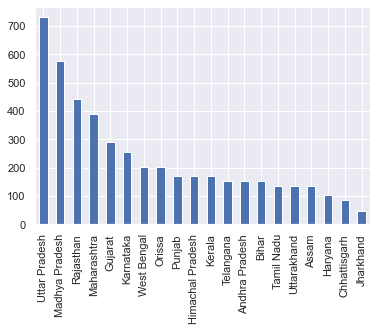

Name of Categorical Variable:- Dist Name 

Srikakulam            17
Sikar                 17
Chittorgarh           17
Churu                 17
Dungarpur             17
Ganganagar            17
Jaipur                17
Jaisalmer             17
Jalore                17
Jhalawar              17
Jhunjhunu             17
Jodhpur               17
Kota                  17
Nagaur                17
Pali                  17
Swami Madhopur        17
Sirohi                17
Bikaner               17
Tonk                  17
Udaipur               17
Salem                 17
Coimbatore            17
Thanjavur             17
Madurai               17
Ramananthapuram       17
Thirunelveli          17
The Nilgiris          17
Kanyakumari           17
Hyderabad             17
Nizamabad             17
Medak                 17
Mahabubnagar          17
Bundi                 17
Bhilwara              17
Warangal              17
Sambalpur             17
Wardha                17
Visakhapatnam         17
Bhandar

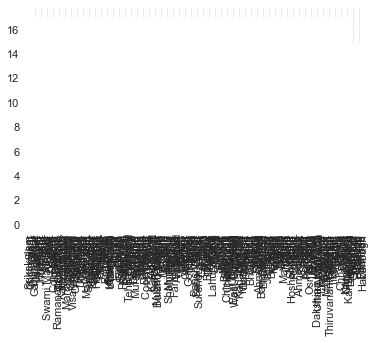

Name of Categorical Variable:- Unique_Ref_Key 

Andhra Pradesh-Srikakulam         17
Rajasthan-Sikar                   17
Rajasthan-Chittorgarh             17
Rajasthan-Churu                   17
Rajasthan-Dungarpur               17
Rajasthan-Ganganagar              17
Rajasthan-Jaipur                  17
Rajasthan-Jaisalmer               17
Rajasthan-Jalore                  17
Rajasthan-Jhalawar                17
Rajasthan-Jhunjhunu               17
Rajasthan-Jodhpur                 17
Rajasthan-Kota                    17
Rajasthan-Nagaur                  17
Rajasthan-Pali                    17
Rajasthan-Swami Madhopur          17
Rajasthan-Sirohi                  17
Rajasthan-Bikaner                 17
Rajasthan-Tonk                    17
Rajasthan-Udaipur                 17
Tamil Nadu-Salem                  17
Tamil Nadu-Coimbatore             17
Tamil Nadu-Thanjavur              17
Tamil Nadu-Madurai                17
Tamil Nadu-Ramananthapuram        17
Tamil Nadu-Thirunelveli    

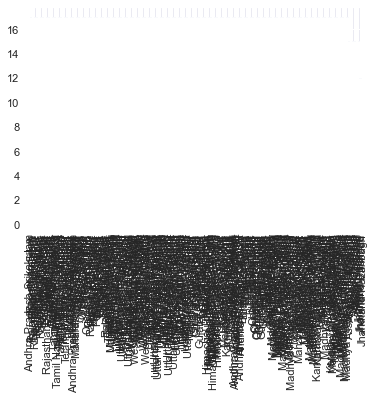

Name of Categorical Variable:- Soil_Type1 

INCEPTISOLS       1309
VERTIC SOILS      1190
USTALF/USTOLLS     371
SANDY ALFISOL      357
ORTHIDS            306
PSSAMENTS          187
UDALFS             136
VERTISOLS          119
FLUVENTS           111
UDOLLS/UDALFS      102
UDUPTS/UDALFS      102
USTALFS             92
LOAMY ALFISOLS      85
PSAMMENTS           51
PSSAMNETS           34
Not_Available       34
DYSTROPEPTS         34
VERTIC SOLS         17
VRTIC SOILS         17
ORTHENTS            17
LOAMY ALFISOL       17
INNCEPTISOLS        17
Name: Soil_Type1, dtype: int64


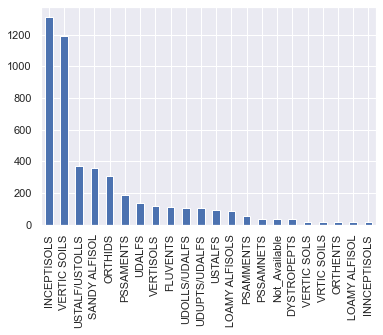

Name of Categorical Variable:- Soil_Type2 

Not_Available     3039
VERTISOLS          493
VERTIC SOILS       255
ORTHIDS            204
INCEPTISOLS        119
SANDY ALFISOL      102
LOAMY ALFISOLS     102
USTALF/USTOLLS     102
UDUPTS/UDALFS      102
PSSAMENTS           51
PSSAMNETS           34
UDOLLS/UDALFS       34
VERTI SOLS          17
VERRTISOLS          17
VERTIC OSILS        17
SANDY ALFISOLS      17
Name: Soil_Type2, dtype: int64


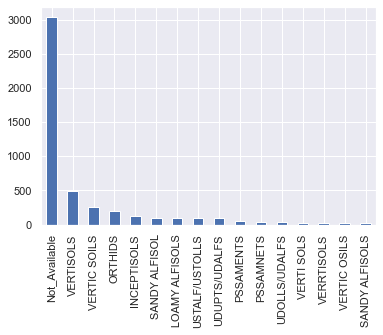

Name of Categorical Variable:- Soil_Type3 

Not_Available     4569
SANDY ALFISOL       34
ORTHIDS             34
VERTISOLS           17
VERTIC SOLS         17
VERTIC SOILS        17
USTALF/USTOLLS      17
Name: Soil_Type3, dtype: int64


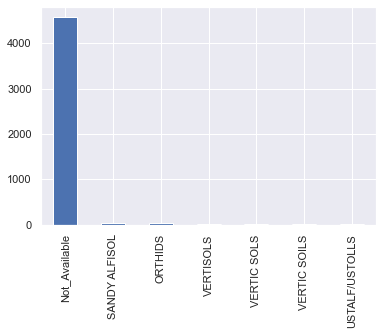

Name of Categorical Variable:- RF_Category 

Normal               2273
Deficient            1785
Excess                273
Large_Deficient       221
Large_Excess          136
Extreme_Deficient      17
Name: RF_Category, dtype: int64


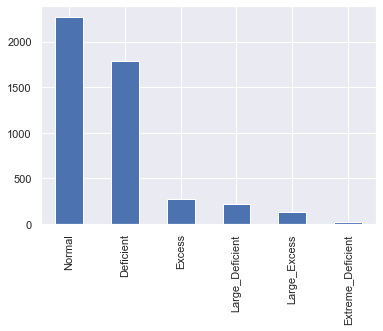

In [129]:
# Univariate Analysis of Categorical Variables in India_Train DataSet
for x in cat_cols_train_IND:
    print("Name of Categorical Variable:-",x,'\n')
    print(Ind_train[x].value_counts())
    Ind_train[x].value_counts().plot.bar()
    plt.show()

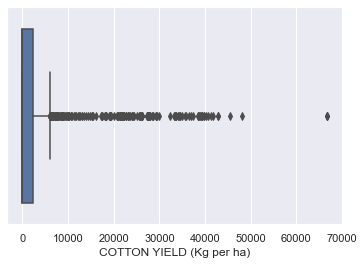

In [130]:
# Univariate Analysis of Numerical Variables India_Train DataSet (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(Ind_train['COTTON YIELD (Kg per ha)']);

# Independent Numerical Variable
#Create_BoxPlotS(Ind_train,num_cols_train_IND,103,10)

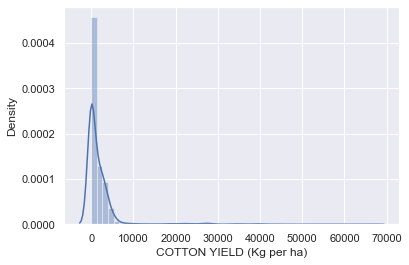

In [131]:
# Univariate Analysis of Numerical Variables India_Train DataSet (Check Normality)

# Dependent Numerical Variable
sns.distplot(Ind_train['COTTON YIELD (Kg per ha)']);

# Independent Numerical Variable
# Create_DistPlots(Ind_train,num_cols_train_IND,103,10)

#### * For USA

In [132]:
# Segregation of Numerical Columns from USA Train Data
num_cols_train_USA = usa_train.select_dtypes(['int64','float64']).columns
print("Numerical Columns in USA_Train Data are :-\n\n")
print(num_cols_train_USA)
print('-------------'*9)

# Segregation of Catagorical Columns from USA Train Data
cat_cols_train_USA = usa_train.select_dtypes(['object']).columns
print("Catagorical Columns in USA_Train Data are :-\n\n")
print(cat_cols_train_USA)
print('-------------'*9)

Numerical Columns in USA_Train Data are :-


Index(['Year', 'Yield (Pounds/ Harvested Area)', 'Average Temperature Value',
       'Average Temperature Anomaly', 'Maximum Temperature Value',
       'Maximum Temperature Anomaly', 'Minimum Temperature Value',
       'Minimum Temperature Anomaly', 'Precipitation Value',
       'Precipitation Anomaly', 'Cooling Degree Days Value',
       'Cooling Degree Days Anomaly', 'Heating Degree Days Value',
       'Heating Degree Days Anomaly',
       'Palmer Drought Severity Index (PDSI) Value',
       'Palmer Drought Severity Index (PDSI) Anomaly',
       'Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly'],
      dtype='object')
--------------------------------------------------------------------------------------------------------

In [133]:
# Check Outliers in the USA_Train Dataset
Check_Outliers(usa_train,num_cols_train_USA)


Number of outliers in "Year" :0

Lower Limit in "Year" : 1961.5

Upper Limit in "Year" : 2015.5

Inter Quartile Range of "Year" : 13.5 


Number of outliers in "Yield (Pounds/ Harvested Area)" :17

Lower Limit in "Yield (Pounds/ Harvested Area)" : -149.0

Upper Limit in "Yield (Pounds/ Harvested Area)" : 1235.0

Inter Quartile Range of "Yield (Pounds/ Harvested Area)" : 346.0 


Number of outliers in "Average Temperature Value" :0

Lower Limit in "Average Temperature Value" : 45.61874999624998

Upper Limit in "Average Temperature Value" : 77.26875000625003

Inter Quartile Range of "Average Temperature Value" : 7.9125000025000105 


Number of outliers in "Average Temperature Anomaly" :0

Lower Limit in "Average Temperature Anomaly" : -2.5749999994999997

Upper Limit in "Average Temperature Anomaly" : 6.5583333325

Inter Quartile Range of "Average Temperature Anomaly" : 2.283333333 


Number of outliers in "Maximum Temperature Value" :0

Lower Limit in "Maximum Temperature Value" : 58.1

Name of Categorical Variable:- State 

MS    28
TN    28
OK    28
GA    28
AZ    28
LA    27
MO    27
AL    27
KY    27
KS    27
IL    26
NM    26
FL    26
CA    26
VA    26
NC    25
NV    25
AR    25
SC    24
TX    24
Name: State, dtype: int64


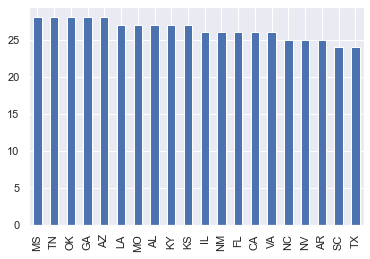

Name of Categorical Variable:- Planted (1000 Acres) 

0        82
1        23
1,000     7
2         6
380       6
325       6
290       6
370       5
610       5
700       4
120       4
1,050     4
360       4
69        4
110       4
3         4
350       4
570       4
250       4
535       4
890       3
66        3
605       3
390       3
270       3
400       3
54        3
340       3
460       3
1,230     3
590       3
320       3
5,500     3
107       3
4         3
440       3
170       3
1,020     2
315       2
490       2
225       2
18        2
56        2
615       2
5         2
1,100     2
335       2
1,150     2
405       2
710       2
100       2
70        2
220       2
330       2
650       2
17        2
430       2
1,170     2
900       2
1,500     2
465       2
410       2
960       2
1,330     2
6,400     2
97        2
480       2
600       2
980       2
245       2
154       2
55        2
1,200     2
33        2
200       2
255       2
540       2
810       2
68        

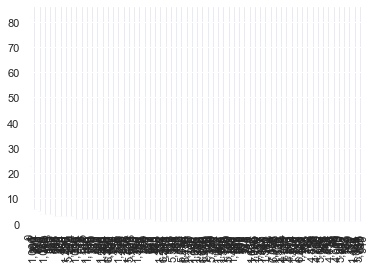

Name of Categorical Variable:- Harvested (1000 Acres) 

0        86
1        26
315       7
50        4
106       4
875       4
530       4
335       4
370       3
120       3
109       3
290       3
615       3
150       3
645       3
990       3
560       3
3         3
385       3
68        3
98        3
565       3
65        3
970       3
4         3
340       3
950       3
160       3
17        3
210       3
69        3
695       2
230       2
600       2
305       2
36        2
29        2
54        2
465       2
377       2
595       2
286       2
37        2
350       2
1,280     2
390       2
359       2
1,300     2
23        2
480       2
245       2
585       2
605       2
42        2
95        2
3,550     2
200       2
1,100     2
55        2
920       2
675       2
49        2
260       2
375       2
104       2
124       2
4,500     2
1,180     2
515       2
215       2
540       2
108       2
995       2
115       2
1,040     2
62        2
300       2
435       2
965     

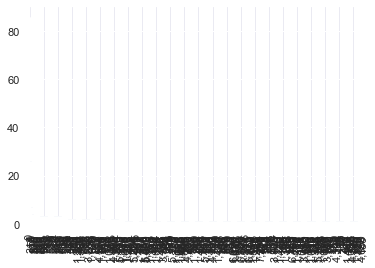

In [134]:
# Univariate Analysis of Categorical Variables in USA_Train DataSet
for x in cat_cols_train_USA:
    print("Name of Categorical Variable:-",x,'\n')
    print(usa_train[x].value_counts())
    usa_train[x].value_counts().plot.bar()
    plt.show()

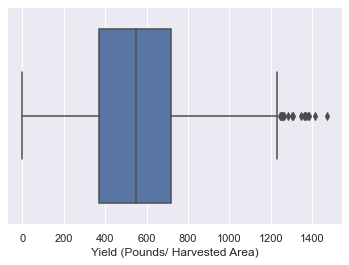

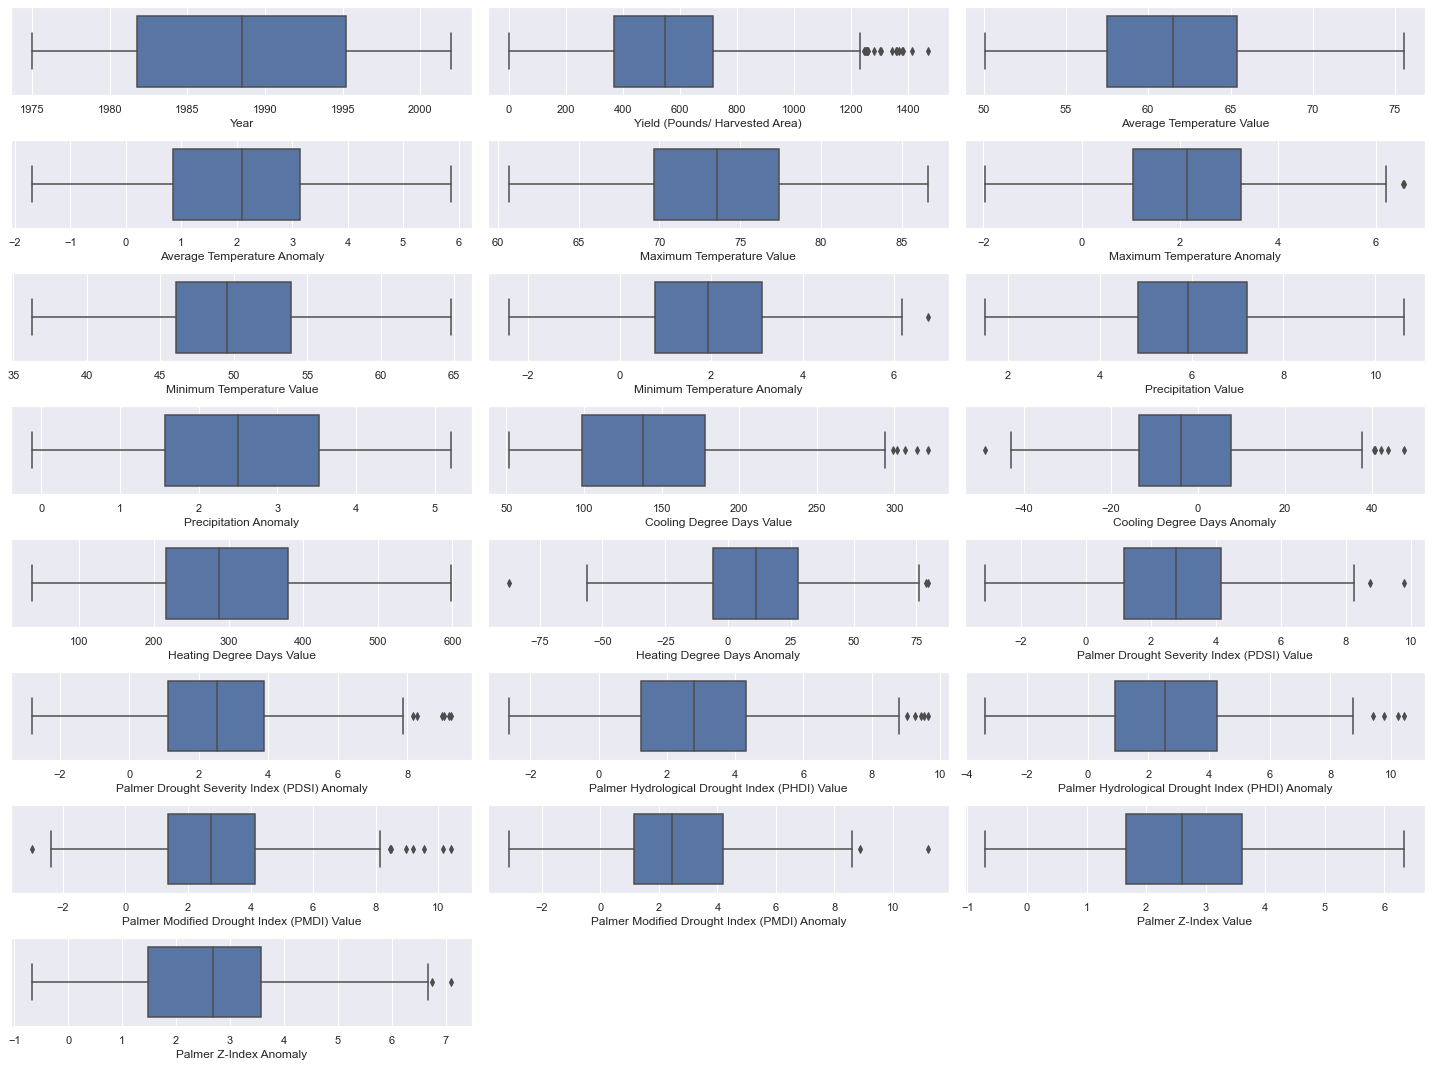

In [135]:
# Univariate Analysis of Numerical Variables USA_Train DataSet (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(usa_train['Yield (Pounds/ Harvested Area)']);

# Independent Numerical Variable
Create_BoxPlotS(usa_train,num_cols_train_USA,11,3)

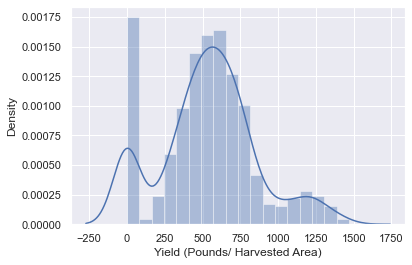

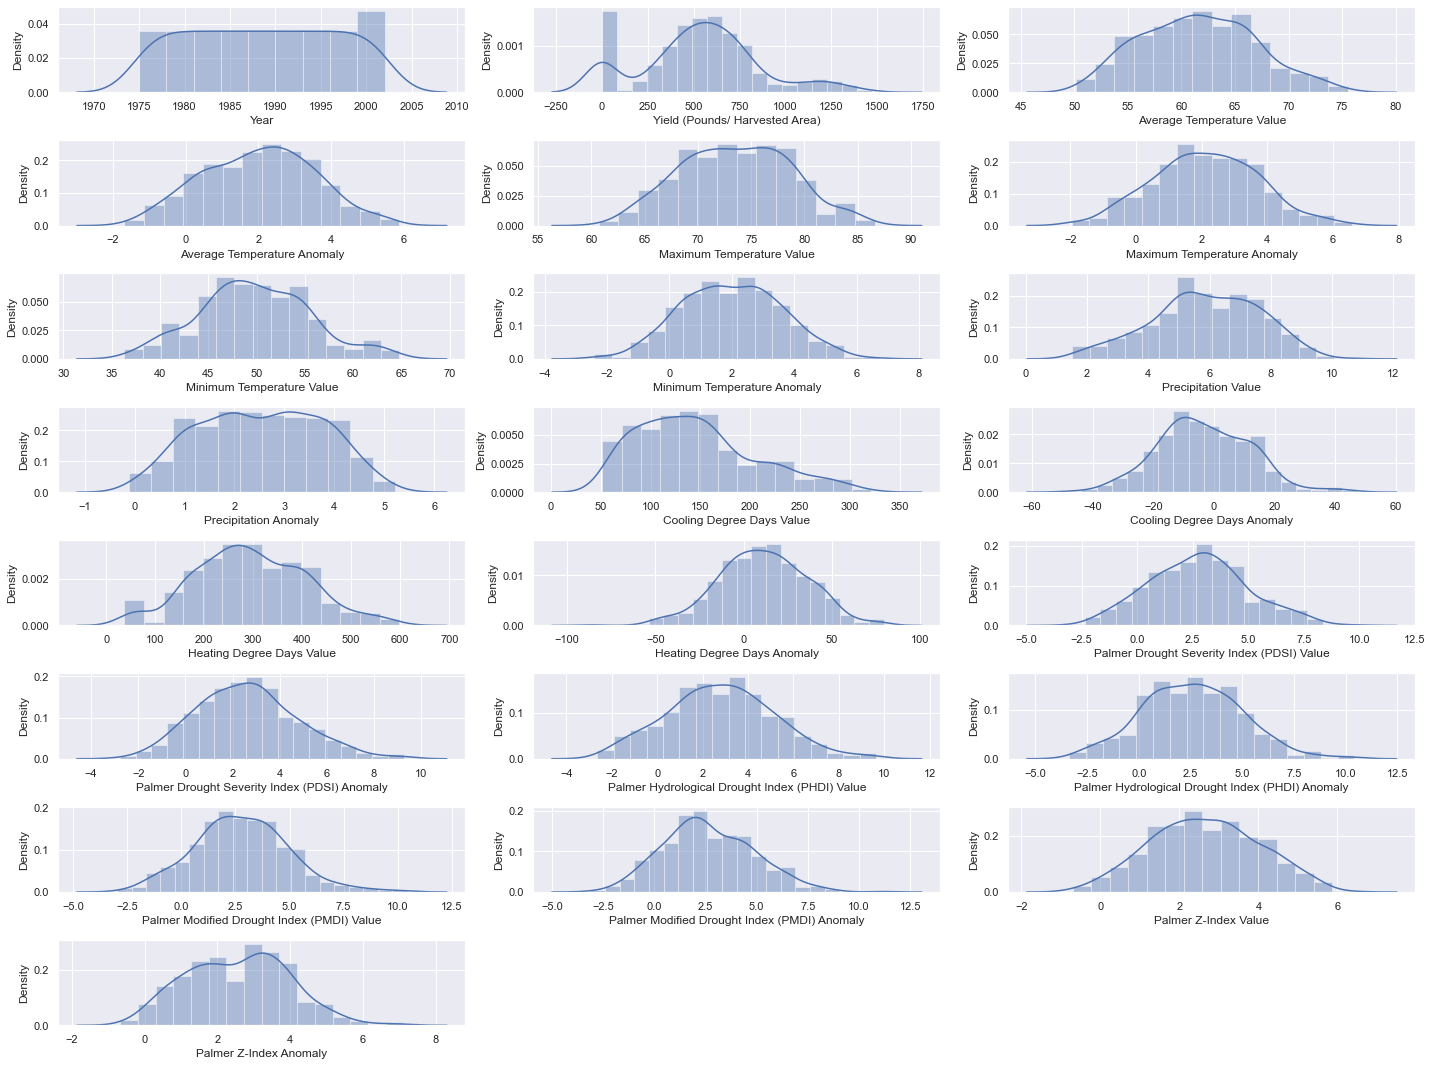

In [136]:
# Univariate Analysis of Numerical Variables USA_Train DataSet (Check Normality)

# Dependent Numerical Variable
sns.distplot(usa_train['Yield (Pounds/ Harvested Area)']);

# Independent Numerical Variable
Create_DistPlots(usa_train,num_cols_train_USA,11,3)

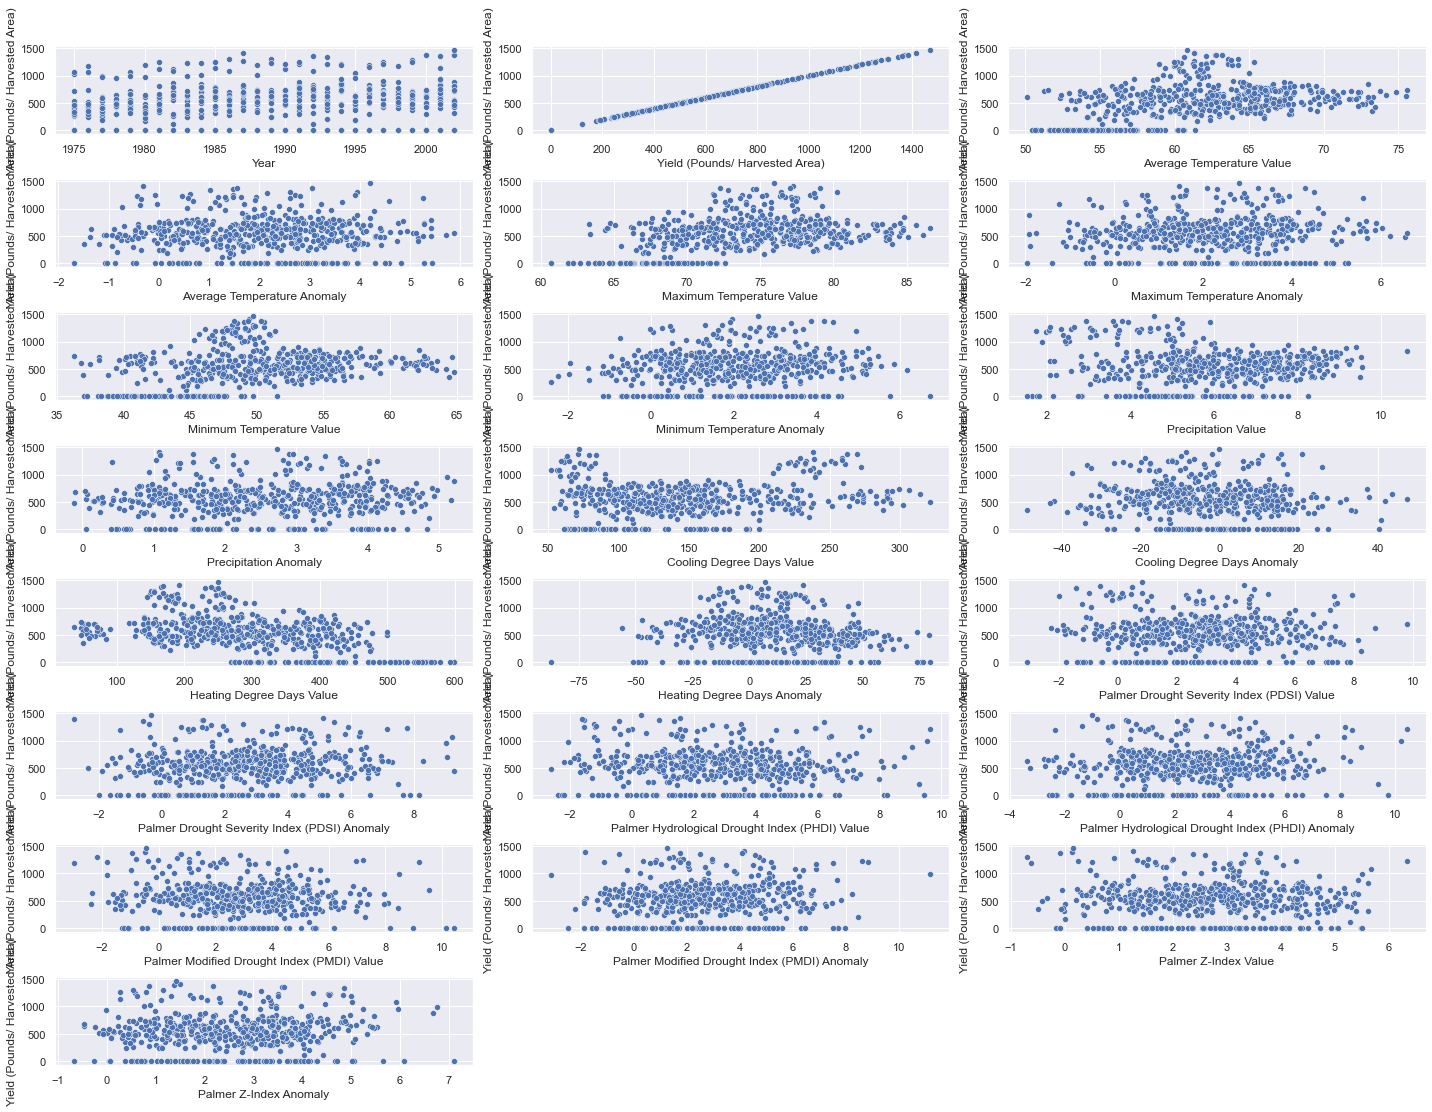

In [137]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_ScatterPlots(usa_train,num_cols_train_USA,'Yield (Pounds/ Harvested Area)',11,3)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Label Encoding of Train Dataset

#### * For India

In [138]:
Label_Encoder(Ind_train)

#### * For USA

In [139]:
Label_Encoder(usa_train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Test DataSet</h2>
</div>

- Label Encoding of Test Dataset

#### * For India

In [140]:
Label_Encoder(Ind_test)

#### * For USA

In [141]:
Label_Encoder(usa_test)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


#### * For India

In [142]:
Ind_train.isnull().sum()

Year                                              0
State Name                                        0
Dist Name                                         0
Unique_Ref_Key                                    0
COTTON AREA (1000 ha)                             0
COTTON PRODUCTION (1000 tons)                     0
COTTON YIELD (Kg per ha)                          0
Soil_Type1                                        0
Soil_Type2                                        0
Soil_Type3                                        0
JANUARY PERCIPITATION (Millimeters)               0
FEBRUARY PERCIPITATION (Millimeters)              0
MARCH PERCIPITATION (Millimeters)                 0
APRIL PERCIPITATION (Millimeters)                 0
MAY PERCIPITATION (Millimeters)                   0
JUNE PERCIPITATION (Millimeters)                  0
JULY PERCIPITATION (Millimeters)                  0
AUGUST PERCIPITATION (Millimeters)                0
SEPTEMBER PERCIPITATION (Millimeters)             0
OCTOBER PERC

#### * For USA

In [143]:
usa_train.isnull().sum()

Year                                                 0
State                                                0
Planted (1000 Acres)                                 0
Harvested (1000 Acres)                               0
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                           28
Average Temperature Anomaly                         31
Maximum Temperature Value                           22
Maximum Temperature Anomaly                         33
Minimum Temperature Value                           27
Minimum Temperature Anomaly                         26
Precipitation Value                                 27
Precipitation Anomaly                               21
Cooling Degree Days Value                           27
Cooling Degree Days Anomaly                         20
Heating Degree Days Value                           25
Heating Degree Days Anomaly                         30
Palmer Drought Severity Index (PDSI) Value          26
Palmer Dro

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


#### * For India

In [144]:
Ind_test.isnull().sum()

Year                                              0
State Name                                        0
Dist Name                                         0
Unique_Ref_Key                                    0
COTTON AREA (1000 ha)                             0
COTTON PRODUCTION (1000 tons)                     0
COTTON YIELD (Kg per ha)                          0
Soil_Type1                                        0
Soil_Type2                                        0
Soil_Type3                                        0
JANUARY PERCIPITATION (Millimeters)               0
FEBRUARY PERCIPITATION (Millimeters)              0
MARCH PERCIPITATION (Millimeters)                 0
APRIL PERCIPITATION (Millimeters)                 0
MAY PERCIPITATION (Millimeters)                   0
JUNE PERCIPITATION (Millimeters)                  0
JULY PERCIPITATION (Millimeters)                  0
AUGUST PERCIPITATION (Millimeters)                0
SEPTEMBER PERCIPITATION (Millimeters)             0
OCTOBER PERC

#### * For USA

In [145]:
usa_test.isnull().sum()

Year                                                 0
State                                                0
Planted (1000 Acres)                                 0
Harvested (1000 Acres)                               0
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                           34
Average Temperature Anomaly                         21
Maximum Temperature Value                           32
Maximum Temperature Anomaly                         21
Minimum Temperature Value                           16
Minimum Temperature Anomaly                         24
Precipitation Value                                 16
Precipitation Anomaly                               23
Cooling Degree Days Value                           16
Cooling Degree Days Anomaly                         18
Heating Degree Days Value                           31
Heating Degree Days Anomaly                         19
Palmer Drought Severity Index (PDSI) Value          23
Palmer Dro

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in USA_Train DataSet</h2>
</div>


In [146]:
usa_train=usa_train.fillna("0")
usa_train= usa_train.astype(float, errors='ignore')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in USA_Test DataSet</h2>
</div>


In [147]:
usa_test=usa_test.fillna("0")
usa_test= usa_test.astype(float, errors='ignore')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


#### * For India

In [148]:
Ind_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Columns: 110 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(97), int32(7), int64(6)
memory usage: 3.8 MB


In [149]:
Ind_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Columns: 110 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(96), int32(7), int64(7)
memory usage: 2.0 MB


#### * For USA

In [150]:
usa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    float64
 1   State                                             560 non-null    float64
 2   Planted (1000 Acres)                              560 non-null    float64
 3   Harvested (1000 Acres)                            560 non-null    float64
 4   Yield (Pounds/ Harvested Area)                    560 non-null    float64
 5   Average Temperature Value                         560 non-null    float64
 6   Average Temperature Anomaly                       560 non-null    float64
 7   Maximum Temperature Value                         560 non-null    float64
 8   Maximum Temperature Anomaly                       560 non-null    float64
 9   Minimum Temperature V

In [151]:
usa_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              400 non-null    float64
 1   State                                             400 non-null    float64
 2   Planted (1000 Acres)                              400 non-null    float64
 3   Harvested (1000 Acres)                            400 non-null    float64
 4   Yield (Pounds/ Harvested Area)                    400 non-null    float64
 5   Average Temperature Value                         400 non-null    float64
 6   Average Temperature Anomaly                       400 non-null    float64
 7   Maximum Temperature Value                         400 non-null    float64
 8   Maximum Temperature Anomaly                       400 non-null    float64
 9   Minimum Temperature V

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


#### * For India

In [152]:
Ind_train = Ind_train.drop(["Year"], axis=1)
Ind_test = Ind_test.drop(["Year"], axis=1)

india_features = Ind_train.drop(["COTTON YIELD (Kg per ha)"], axis=1)
india_target = Ind_train["COTTON YIELD (Kg per ha)"]
Ind_test = Ind_test.drop(['COTTON YIELD (Kg per ha)'],axis=1)

X_train, X_val, y_train, y_val = train_test_split(india_features
                                                  , india_target
                                                  , test_size=0.15
                                                  , random_state=0)

#### * For USA

In [153]:
usa_train=usa_train.drop(['Year','State'
                          ,'Planted (1000 Acres)'
                          ,"Harvested (1000 Acres)"], axis=1)
usa_test=usa_test.drop(['State','Planted (1000 Acres)'
                        ,"Harvested (1000 Acres)"
                        ,'Yield (Pounds/ Harvested Area)','Year'], axis=1)

usa_features = usa_train.drop(["Yield (Pounds/ Harvested Area)"], axis=1)
usa_target = usa_train["Yield (Pounds/ Harvested Area)"]

X_train1, X_val1, y_train1, y_val1 = train_test_split(usa_features
                                                      , usa_target
                                                      , test_size=0.15
                                                      , random_state=0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>


#### * For India

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Random Forest Regressor</h2>
</div>

In [156]:
IND_Model1 = RandomForestRegressor(random_state=0)
IND_Model1.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(IND_Model1.score(X_train, y_train)))
print('-------------'*9)
y_pred_val11 = IND_Model1.predict(X_val)
MSE_IND_M1 = mean_squared_error(y_val, y_pred_val11)
print(f"India Validation MSE for Model 1: {MSE_IND_M1}")

Accuracy of Random Forest Regressor on training set: 0.95
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 1: 3174620.882395158


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Random Forest Regressor with best Hyperparameters generated by Random Search</h2>
</div>

In [157]:
IND_Model2 = RandomForestRegressor(bootstrap=True,ccp_alpha=0.0
                                      ,criterion='mse',max_depth=11
                                      ,max_features=1.0,max_leaf_nodes=None
                                      ,max_samples=None,min_impurity_decrease=0.1
                                      ,min_samples_leaf=4,min_samples_split=7
                                      ,min_weight_fraction_leaf=0.0,n_estimators=80
                                      ,n_jobs=-1,oob_score=False
                                      ,random_state=12330,verbose=0
                                      ,warm_start=False)
IND_Model2.fit(X_train,y_train) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(IND_Model2.score(X_train, y_train)))
print('-------------'*9)
y_pred_val22 = IND_Model2.predict(X_val)
MSE_IND_M2 = mean_squared_error(y_val, y_pred_val22)
print(f"India Validation MSE for Model 2: {MSE_IND_M2}")

Accuracy of Random Forest Regressor on training set: 0.89
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 2: 3045823.9248801265


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Cat Boost Regressor</h2>
</div>

In [158]:
IND_Model3 = CatBoostRegressor(random_state=123,logging_level='Silent')
IND_Model3.fit(X_train,y_train) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(IND_Model3.score(X_train, y_train)))
print('-------------'*9)
y_pred_val33 = IND_Model3.predict(X_val)
MSE_IND_M3 = mean_squared_error(y_val, y_pred_val33)
print(f"India Validation MSE for Model 3: {MSE_IND_M3}")

Accuracy of Cat Boost Regressor on training set: 0.99
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 3: 2672401.124733912


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- XGB Regressor</h2>
</div>

In [159]:
IND_Model4 = XGBRegressor(random_state=0)
IND_Model4.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(IND_Model4.score(X_train, y_train)))
print('-------------'*9)
y_pred_val44 = IND_Model4.predict(X_val)
MSE_IND_M4 = mean_squared_error(y_val, y_pred_val44)
print(f"India Validation MSE for Model 4: {MSE_IND_M4}")

Accuracy of XGB Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 4: 3350740.685599213


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Fitting XGB Regressor with best Hyperparameters generated by Random Search</h2>
</div>

In [160]:
IND_Model5 = XGBRegressor(base_score=0.5,booster='gbtree'
                             ,callbacks=None,colsample_bylevel=1
                             ,colsample_bynode=1,colsample_bytree=0.7
                             ,early_stopping_rounds=None,enable_categorical=False
                             ,eval_metric=None,gamma=0,gpu_id=-1
                             ,grow_policy='depthwise',importance_type=None
                             ,interaction_constraints='',learning_rate=0.027
                             ,max_bin=256,max_cat_to_onehot=4,max_delta_step=0
                             ,max_depth=3,max_leaves=0,min_child_weight=4
                             ,monotone_constraints='()',n_estimators=220
                             ,n_jobs=-1,num_parallel_tree=1
                             ,objective='reg:squarederror',predictor='auto'
                             ,random_state=12360, reg_alpha=1e-06)
IND_Model5.fit(X_train,y_train) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(IND_Model5.score(X_train, y_train)))
print('-------------'*9)
y_pred_val55 = IND_Model5.predict(X_val)
MSE_IND_M5 = mean_squared_error(y_val, y_pred_val55)
print(f"India Validation MSE for Model 5: {MSE_IND_M5}")

Accuracy of XGB Regressor on training set: 0.84
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 5: 3553161.416419843


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [161]:
IND_Model6 = LGBMRegressor(random_state=0)
IND_Model6.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(IND_Model6.score(X_train, y_train)))
print('-------------'*9)
y_pred_val66 = IND_Model6.predict(X_val)
MSE_IND_M6 = mean_squared_error(y_val, y_pred_val66)
print(f"India Validation MSE for Model 6: {MSE_IND_M6}")

Accuracy of LGBM Regressor on training set: 0.96
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 6: 3291094.217765907


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Fitting Light Gradient Boosted Machine(LGBM) Regressor with best Hyperparameters generated by Random Search</h2>
</div>

In [162]:
IND_Model7 = LGBMRegressor(bagging_fraction=1.0,bagging_freq=3
                              ,boosting_type='gbdt',class_weight=None
                              ,colsample_bytree=1.0,feature_fraction=0.6
                              ,importance_type='split',learning_rate=0.256
                              ,max_depth=-1,min_child_samples=20
                              ,min_child_weight=0.001,n_jobs=-1
                              ,min_split_gain=0.1,n_estimators=30
                              ,num_leaves=70,objective=None
                              ,random_state=12,reg_alpha=0.7,reg_lambda=3
                              ,silent='warn',subsample=1.0
                              ,subsample_for_bin=200000,subsample_freq=0)
IND_Model7.fit(X_train,y_train) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(IND_Model7.score(X_train, y_train)))
print('-------------'*9)
y_pred_val77 = IND_Model7.predict(X_val)
MSE_IND_M7 = mean_squared_error(y_val, y_pred_val77)
print(f"India Validation MSE for Model 7: {MSE_IND_M7}")

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
Accuracy of LGBM Regressor on training set: 0.94
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 7: 2611332.859457254


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Gradient Boosting Regressor</h2>
</div>

In [163]:
IND_Model8 = GradientBoostingRegressor(random_state=0)
IND_Model8.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(IND_Model8.score(X_train, y_train)))
print('-------------'*9)
y_pred_val88 = IND_Model8.predict(X_val)
MSE_IND_M8 = mean_squared_error(y_val, y_pred_val88)
print(f"India Validation MSE for Model 8: {MSE_IND_M8}")

Accuracy of Gradient Boosting Regressor on training set: 0.92
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 8: 3619181.3370778286


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9-  Fitting Gradient Boosting Regressor with best Hyperparameters generated by Random Search</h2>
</div>

In [164]:
IND_Model9 = GradientBoostingRegressor(alpha=0.9,ccp_alpha=0.0
                                          ,criterion='friedman_mse',init=None
                                          ,learning_rate=0.129,loss='squared_error'
                                          ,max_depth=8,max_features=1.0
                                          ,max_leaf_nodes=None,min_impurity_decrease=0.02
                                          ,min_samples_leaf=1,min_samples_split=2
                                          ,min_weight_fraction_leaf=0.0,n_estimators=230
                                          ,n_iter_no_change=None,random_state=12330
                                          ,subsample=0.6,tol=0.0001
                                          ,validation_fraction=0.1,verbose=0
                                          ,warm_start=False)
IND_Model9.fit(X_train,y_train) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(IND_Model9.score(X_train, y_train)))
print('-------------'*9)
y_pred_val99 = IND_Model9.predict(X_val)
MSE_IND_M9 = mean_squared_error(y_val, y_pred_val99)
print(f"India Validation MSE for Model 9: {MSE_IND_M9}")

Accuracy of Gradient Boosting Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 9: 3004990.8052613963


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Histogram Gradient Boosting Regression</h2>
</div>

In [165]:
IND_Model10 = HistGradientBoostingRegressor(random_state =0)
IND_Model10.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(IND_Model10.score(X_train, y_train)))
print('-------------'*9)
y_pred_val100 = IND_Model10.predict(X_val)
MSE_IND_M10 = mean_squared_error(y_val, y_pred_val100)
print(f"India Validation MSE for Model 10: {MSE_IND_M10}")

Accuracy of Hist Gradient Boosting Regressor on training set: 0.96
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 10: 3401217.7210005284


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Extra Trees Regressor</h2>
</div>

In [166]:
IND_Model11 = ExtraTreesRegressor(bootstrap=True,ccp_alpha=0.0
                                  ,criterion='mse',max_depth=9
                                  ,max_features=1.0,max_leaf_nodes=None
                                  ,max_samples=None,min_impurity_decrease=0.1
                                  ,min_samples_leaf=4,min_samples_split=7
                                  ,min_weight_fraction_leaf=0.0,n_estimators=8
                                  ,n_jobs=-1,oob_score=False
                                  ,random_state=0,verbose=0,warm_start=False)
IND_Model11.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(IND_Model11.score(X_train, y_train)))
print('-------------'*9)
y_pred_val111 = IND_Model11.predict(X_val)
MSE_IND_M11 = mean_squared_error(y_val, y_pred_val111)
print(f"India Validation MSE for Model 11: {MSE_IND_M11}")

Accuracy of Hist Gradient Boosting Regressor on training set: 0.79
---------------------------------------------------------------------------------------------------------------------
India Validation MSE for Model 11: 3239554.1114458046


#### * For USA

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Random Forest Regressor</h2>
</div>

In [167]:
USA_Model1 = RandomForestRegressor(random_state=0)
USA_Model1.fit(X_train1,y_train1) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(USA_Model1.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val1 = USA_Model1.predict(X_val1)
MSE_USA_M1 = mean_squared_error(y_val1, y_pred_val1)
print(f"USA Validation MSE for Model 1: {MSE_USA_M1}") 

Accuracy of Random Forest Regressor on training set: 0.94
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 1: 39343.33269761905


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Random Forest Regressor with best Hyperparameters generated by Random Search</h2>
</div>

In [168]:
USA_Model2 = RandomForestRegressor(random_state=0
                                        ,n_estimators = 7000
                                        ,min_samples_split = 5
                                        ,min_samples_leaf = 2
                                        ,max_features = 'auto'
                                        ,max_depth = 90
                                        ,bootstrap = True)
USA_Model2.fit(X_train1,y_train1) 
print('Accuracy of Random Forest Regressor on training set: {:.2f}'
     .format(USA_Model2.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val2 = USA_Model2.predict(X_val1)
MSE_USA_M2 = mean_squared_error(y_val1, y_pred_val2)
print(f"USA Validation MSE for Model 2: {MSE_USA_M2}")

Accuracy of Random Forest Regressor on training set: 0.91
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 2: 38667.83232486828


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Cat Boost Regressor</h2>
</div>

In [169]:
USA_Model3 = CatBoostRegressor(random_state=123,logging_level='Silent')
USA_Model3.fit(X_train1,y_train1) 
print('Accuracy of Cat Boost Regressor on training set: {:.2f}'
     .format(USA_Model3.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val3 = USA_Model3.predict(X_val1)
MSE_USA_M3 = mean_squared_error(y_val1, y_pred_val3)
print(f"USA Validation MSE for Model 3: {MSE_USA_M3}")

Accuracy of Cat Boost Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 3: 41282.319448854716


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- XGB Regressor</h2>
</div>

In [170]:
USA_Model4 = XGBRegressor(random_state=0)
USA_Model4.fit(X_train1,y_train1) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(USA_Model4.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val4 = USA_Model4.predict(X_val1)
MSE_USA_M4 = mean_squared_error(y_val1, y_pred_val4)
print(f"USA Validation MSE for Model 4: {MSE_USA_M4}")

Accuracy of XGB Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 4: 45502.90760576562


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Fitting XGB Regressor with best Hyperparameters generated by Random Search</h2>
</div>

In [171]:
USA_Model5 = XGBRegressor(base_score=None,booster='gbtree'
                          ,callbacks=None,colsample_bylevel=None
                          ,colsample_bynode=None,colsample_bytree=0.9
                          ,early_stopping_rounds=None,enable_categorical=False
                          ,eval_metric=None,feature_types=None,gamma=None
                          ,gpu_id=None,grow_policy=None,importance_type=None
                          ,interaction_constraints=None,learning_rate=0.15
                          ,max_bin=None,max_cat_threshold=None
                          ,max_cat_to_onehot=None,max_delta_step=None
                          ,max_depth=7,max_leaves=None,min_child_weight=3
                          ,monotone_constraints=None,n_estimators=290
                          ,n_jobs=-1,num_parallel_tree=None
                          ,predictor=None,random_state=123)

USA_Model5.fit(X_train1,y_train1) 
print('Accuracy of XGB Regressor on training set: {:.2f}'
     .format(USA_Model5.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val5 = USA_Model5.predict(X_val1)
MSE_USA_M5 = mean_squared_error(y_val1, y_pred_val5)
print(f"USA Validation MSE for Model 5: {MSE_USA_M5}")

Accuracy of XGB Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 5: 39629.3892869922


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Light Gradient Boosted Machine(LGBM) Regressor</h2>
</div>

In [172]:
USA_Model6 = LGBMRegressor(random_state=0)
USA_Model6.fit(X_train1,y_train1) 
print('Accuracy of LGBM Regressor on training set: {:.2f}'
     .format(USA_Model6.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val6 = USA_Model6.predict(X_val1)
MSE_USA_M6 = mean_squared_error(y_val1, y_pred_val6)
print(f"USA Validation MSE for Model 6: {MSE_USA_M6}")

Accuracy of LGBM Regressor on training set: 0.98
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 6: 44060.678846814124


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Gradient Boosting Regressor</h2>
</div>

In [173]:
USA_Model7 = GradientBoostingRegressor(random_state=11)
USA_Model7.fit(X_train1,y_train1) 
print('Accuracy of Gradient Boosting Regressor on training set: {:.2f}'
     .format(USA_Model7.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val7 = USA_Model7.predict(X_val1)
MSE_USA_M7 = mean_squared_error(y_val1, y_pred_val7)
print(f"USA Validation MSE for Model 7: {MSE_USA_M7}")

Accuracy of Gradient Boosting Regressor on training set: 0.88
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 7: 45714.806385431024


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- Histogram Gradient Boosting Regression</h2>
</div>

In [174]:
USA_Model8 = HistGradientBoostingRegressor(random_state =0)
USA_Model8.fit(X_train1,y_train1) 
print('Accuracy of Hist Gradient Boosting Regressor on training set: {:.2f}'
     .format(USA_Model8.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val8 = USA_Model8.predict(X_val1)
MSE_USA_M8 = mean_squared_error(y_val1, y_pred_val8)
print(f"USA Validation MSE for Model 8: {MSE_USA_M8}")

Accuracy of Hist Gradient Boosting Regressor on training set: 0.98
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 8: 42692.99106208062


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Ada Boost Regressor</h2>
</div>

In [175]:
USA_Model9 = AdaBoostRegressor(learning_rate=0.01
                                  ,n_estimators=60
                                  ,random_state=123)
USA_Model9.fit(X_train1,y_train1) 
print('Accuracy of Ada Boost Regressor on training set: {:.2f}'
     .format(USA_Model9.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val9 = USA_Model9.predict(X_val1)
MSE_USA_M9 = mean_squared_error(y_val1, y_pred_val9)
print(f"USA Validation MSE for Model 9: {MSE_USA_M9}")

Accuracy of Ada Boost Regressor on training set: 0.62
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 9: 43852.835159346774


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Extra Trees Regressor</h2>
</div>

In [176]:
USA_Model10 = ExtraTreesRegressor(n_jobs=-1,random_state=12356)
USA_Model10.fit(X_train1,y_train1) 
print('Accuracy of Extra Trees Regressor on training set: {:.2f}'
     .format(USA_Model10.score(X_train1, y_train1)))
print('-------------'*9)
y_pred_val10 = USA_Model10.predict(X_val1)
MSE_USA_M10 = mean_squared_error(y_val1, y_pred_val10)
print(f"USA Validation MSE for Model 10: {MSE_USA_M10}")

Accuracy of Extra Trees Regressor on training set: 1.00
---------------------------------------------------------------------------------------------------------------------
USA Validation MSE for Model 10: 37500.39620714285


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

#### * For India

In [177]:
# Import India Test data for the prediction of the Target Variable
x_IND = np.array(Ind_test)

# Prediction using Model 1
y_pred_IND_M1 = IND_Model1.predict(x_IND) #Mean Square Error = 3174620.882395158

# Prediction using Model 2
y_pred_IND_M2 = IND_Model2.predict(x_IND) #Mean Square Error = 3201964.509920481

# Prediction using Model 3
y_pred_IND_M3 = IND_Model3.predict(x_IND) #Mean Square Error = 3104373.1260361834

# Prediction using Model 4
y_pred_IND_M4 = IND_Model4.predict(x_IND) #Mean Square Error = 3350740.685599213

# Prediction using Model 5
y_pred_IND_M5 = IND_Model5.predict(x_IND) #Mean Square Error = 3752638.272154247

# Prediction using Model 6
y_pred_IND_M6 = IND_Model6.predict(x_IND) #Mean Square Error = 3291094.217765907

# Prediction using Model 7
y_pred_IND_M7 = IND_Model7.predict(x_IND) #Mean Square Error = 2936898.3094715592

# Prediction using Model 8
y_pred_IND_M8 = IND_Model8.predict(x_IND) #Mean Square Error = 3619181.3370778286

# Prediction using Model 9
y_pred_IND_M9 = IND_Model9.predict(x_IND) #Mean Square Error = 3232378.4334981865

# Prediction using Model 10
y_pred_IND_M10 = IND_Model10.predict(x_IND) #Mean Square Error = 3401217.7210005284

# Prediction using Model 11
y_pred_IND_M11 = IND_Model11.predict(x_IND) #Mean Square Error = 3239554.1114458046

# Final Prediction using Model 7
submission_india=pd.DataFrame(y_pred_IND_M7,columns=['COTTON YIELD (Kg per ha)'])

#### * For USA

In [178]:
# Import USA Test data for the prediction of the Target Variable
x_USA = np.array(usa_test)

# Prediction using Model 1
y_pred_USA_M1 = USA_Model1.predict(x_USA) #Mean Square Error = 39343.33269761905

# Prediction using Model 2
y_pred_USA_M2 = USA_Model2.predict(x_USA) #Mean Square Error = 38667.83232486828

# Prediction using Model 3
y_pred_USA_M3 = USA_Model3.predict(x_USA) #Mean Square Error = 41949.528035940086

# Prediction using Model 4
y_pred_USA_M4 = USA_Model4.predict(x_USA) #Mean Square Error = 45502.90760576562

# Prediction using Model 5
y_pred_USA_M5 = USA_Model5.predict(x_USA) #Mean Square Error = 39629.39419738174

# Prediction using Model 6
y_pred_USA_M6 = USA_Model6.predict(x_USA) #Mean Square Error = 44060.678846814124

# Prediction using Model 7
y_pred_USA_M7 = USA_Model7.predict(x_USA) #Mean Square Error = 45714.806385431024

# Prediction using Model 8
y_pred_USA_M8 = USA_Model8.predict(x_USA) #Mean Square Error = 42692.99106208062

# Prediction using Model 9
y_pred_USA_M9 = USA_Model9.predict(x_USA) #Mean Square Error = 43852.835159346774

# Prediction using Model 10
y_pred_USA_M10 = USA_Model10.predict(x_USA) #Mean Square Error = 38079.494503571426

# Final Prediction using Ensemble Technique
y_pred_USA = (0.7*y_pred_USA_M10 + 0.3*y_pred_USA_M2) #Mean Square Error = 13393157.14170 

submission_usa=pd.DataFrame(y_pred_USA,columns=['Yield (Pounds/ Harvested Area)'])

#### * For USA Commodity Prices

In [179]:
commodity['Year']=pd.to_numeric(commodity['Year'])
submission_commodity=commodity[(commodity['Year']>=2003)&(commodity['Year']<=2022)]
submission_commodity=submission_commodity["Cotton_Price[Dollar/ton]"]

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [180]:
submission = pd.concat([submission_usa,submission_india,submission_commodity],axis=1)
submission = submission.fillna(0)
submission.to_csv(r"C:\Users\PC\Pictures\MH\Sustainability-Hackathon -June23\Best_Model_By_Aniiket_Barphe.csv",index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission MSE Score:**

**1) Private Leaderboard :-** 8077057.02558

**2) Public Leaderboard :-** 13393056.30128

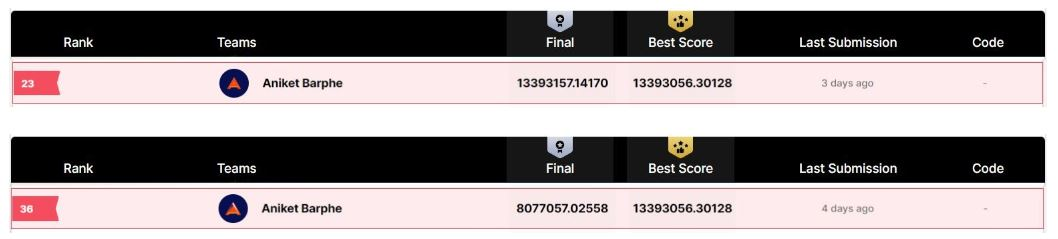

**Competition Link:-** 

https://machinehack.com/hackathons/genpact_google_for_developer_sustainability_hackathon_lets_crack_the_climate_resilience_code/leaderboard

**Rank Scored:-**

a) **23** out of **4065** registered participants (Public Leaderboard)

b) **36** out of **4065** registered participants (Private Leaderboard)